In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
election_data_2014 = pd.read_csv('constituency_wise_results_2014.csv')
election_data_2019 = pd.read_csv('constituency_wise_results_2019.csv')

election_data_2014 = election_data_2014.applymap(lambda x: x.strip().title() if isinstance(x, str) else x)
election_data_2019 = election_data_2019.applymap(lambda x: x.strip().title() if isinstance(x, str) else x)

election_data_2014

state     pc_name             candidate  sex   age category  \
0     Andhra Pradesh    Adilabad          Godam Nagesh    M  49.0       St   
1     Andhra Pradesh    Adilabad                Naresh    M  37.0       St   
2     Andhra Pradesh    Adilabad         Ramesh Rathod    M  48.0       St   
3     Andhra Pradesh    Adilabad       Rathod Sadashiv    M  55.0       St   
4     Andhra Pradesh    Adilabad      Nethawath Ramdas    M  44.0       St   
...              ...         ...                   ...  ...   ...      ...   
8350      Puducherry  Puducherry  Puvala Nageswara Rao    M  60.0      Gen   
8351      Puducherry  Puducherry            K. Manjini    M  41.0      Gen   
8352      Puducherry  Puducherry            R. Valavan    M  40.0      Gen   
8353      Puducherry  Puducherry             V. Vijaya    F  29.0      Gen   
8354      Puducherry  Puducherry     None Of The Above  NaN   NaN      NaN   

     party    party_symbol  general_votes  postal_votes  total_votes  \
0      Trs             Car         425762          5085       430847   
1      Inc            Hand         257994          1563       259557   
2      Tdp         Bicycle         182879          1319       184198   
3      Bsp        Elephant          94363            57        94420   
4      Ind  Auto- Rickshaw          41028             4        41032   
...    ...             ...            ...           ...          ...   
8350   Ind  Sewing Machine            465             0          465   
8351   Ind         Coconut            767             0          767   
8352   Ind    Carrom Board            497             0          497   
8353   Ind    Green Chilli            746             0          746   
8354  Nota            Nota          22267             1        22268   

      total_electors  
0            1386282  
1            1386282  
2            1386282  
3            1386282  
4            1386282  
...              ...  
8350          901357  
8351          901357  
8352          901357  
8353          901357  
8354          901357  

[8355 rows x 12 columns]

In [3]:
election_data_2014.isnull().sum()

state               0
pc_name             0
candidate           0
sex               510
age               510
category          510
party               0
party_symbol        0
general_votes       0
postal_votes        0
total_votes         0
total_electors      0
dtype: int64

In [4]:
election_data_2019

state     pc_name  \
0     Andhra Pradesh       Aruku   
1     Andhra Pradesh       Aruku   
2     Andhra Pradesh       Aruku   
3     Andhra Pradesh       Aruku   
4     Andhra Pradesh       Aruku   
...              ...         ...   
8592      Puducherry  Puducherry   
8593      Puducherry  Puducherry   
8594      Puducherry  Puducherry   
8595      Puducherry  Puducherry   
8596      Puducherry  Puducherry   

                                              candidate     sex   age  \
0                                   Kishore Chandra Deo    Male  72.0   
1     Dr. Kosuri Kasi Viswanadha Veera Venkata Satya...    Male  54.0   
2                                      Goddeti. Madhavi  Female  26.0   
3                                Shruti Devi Vyricherla  Female  46.0   
4                                   Gangulaiah Vampuru.    Male  49.0   
...                                                 ...     ...   ...   
8592                         Tiravitamankai@Lourdhumary  Female  57.0   
8593                                        Ims. Balaji    Male  32.0   
8594                                           Ramesh.D    Male  49.0   
8595                                      V. Ramamurthi    Male  74.0   
8596                                               Nota     NaN   NaN   

     category  party   party_symbol  general_votes  postal_votes  total_votes  \
0          St    Tdp        Bicycle         336163          1938       338101   
1          St    Bjp          Lotus          17578           289        17867   
2          St  Ysrcp    Ceiling Fan         557561          4629       562190   
3          St    Inc           Hand          17656            74        17730   
4          St    Jnp  Glass Tumbler          42245           549        42794   
...       ...    ...            ...            ...           ...          ...   
8592  General    Ind          Slate            870             0          870   
8593  General    Ind            Bat           2546             0         2546   
8594       Sc    Ind           Mike           1653             0         1653   
8595  General    Ind        Whistle            641             1          642   
8596      NaN   Nota            NaN          12192             7        12199   

      total_electors  
0            1451418  
1            1451418  
2            1451418  
3            1451418  
4            1451418  
...              ...  
8592          973410  
8593          973410  
8594          973410  
8595          973410  
8596          973410  

[8597 rows x 12 columns]

In [5]:
# List of cities in Telangana
telangana = ['Adilabad', 'Bhongir', 'Warangal', 'Chelvella', 'Hyderabad', 'Karimnagar', 'Khammam', 
    'Mahabubabad', 'Mahbubnagar', 'Malkajgiri', 'Medak', 'Nagarkurnool', 'Nalgonda', 
    'Nizamabad', 'Peddapalle', 'Secundrabad', 'Zahirabad']

election_data_2014['pc_name'] = election_data_2014['pc_name'].apply(lambda x: x.strip().title())
election_data_2014.loc[election_data_2014['pc_name'].isin(telangana), 'state'] = 'Telangana'

election_data_2019['pc_name'] = election_data_2019['pc_name'].apply(lambda x: x.strip().title())
election_data_2019.loc[election_data_2019['pc_name'].isin(telangana), 'state'] = 'Telangana'

election_data_2014.head()
print(" ")
election_data_2019.head()

state pc_name                                          candidate  \
0  Andhra Pradesh   Aruku                                Kishore Chandra Deo   
1  Andhra Pradesh   Aruku  Dr. Kosuri Kasi Viswanadha Veera Venkata Satya...   
2  Andhra Pradesh   Aruku                                   Goddeti. Madhavi   
3  Andhra Pradesh   Aruku                             Shruti Devi Vyricherla   
4  Andhra Pradesh   Aruku                                Gangulaiah Vampuru.   

      sex   age category  party   party_symbol  general_votes  postal_votes  \
0    Male  72.0       St    Tdp        Bicycle         336163          1938   
1    Male  54.0       St    Bjp          Lotus          17578           289   
2  Female  26.0       St  Ysrcp    Ceiling Fan         557561          4629   
3  Female  46.0       St    Inc           Hand          17656            74   
4    Male  49.0       St    Jnp  Glass Tumbler          42245           549   

   total_votes  total_electors  
0       338101         1451418  
1        17867         1451418  
2       562190         1451418  
3        17730         1451418  
4        42794         1451418

DATA VALIDATION

In [6]:
pd.set_option("display.max_rows",None)
print("count of state in 2014 elections:",election_data_2014["state"].nunique())
print(" ")
print("count of constituencies in 2014 elections:",election_data_2014["pc_name"].nunique())
print(" ")
unique_combinations = election_data_2014[['state', 'pc_name']].drop_duplicates().sort_values(by=["state","pc_name"],ascending=True)
unique_combinations

count of state in 2014 elections: 34
 
count of constituencies in 2014 elections: 508
 


state                    pc_name
8109  Andaman & Nicobar Islands  Andaman & Nicobar Islands
370              Andhra Pradesh                 Amalapuram
338              Andhra Pradesh                 Anakapalli
550              Andhra Pradesh                  Anantapur
282              Andhra Pradesh                      Aruku
491              Andhra Pradesh                    Bapatla
632              Andhra Pradesh                   Chittoor
415              Andhra Pradesh                      Eluru
466              Andhra Pradesh                     Guntur
564              Andhra Pradesh                   Hindupur
577              Andhra Pradesh                     Kadapa
347              Andhra Pradesh                   Kakinada
537              Andhra Pradesh                    Kurnool
431              Andhra Pradesh              Machilipatnam
522              Andhra Pradesh                    Nandyal
479              Andhra Pradesh               Narasaraopet
400              Andhra Pradesh                 Narsapuram
592              Andhra Pradesh                    Nellore
506              Andhra Pradesh                     Ongole
385              Andhra Pradesh                Rajahmundry
622              Andhra Pradesh                   Rajampet
294              Andhra Pradesh                 Srikakulam
607              Andhra Pradesh                   Tirupati
443              Andhra Pradesh                 Vijayawada
315              Andhra Pradesh              Visakhapatnam
305              Andhra Pradesh               Vizianagaram
649           Arunachal Pradesh             Arunachal East
640           Arunachal Pradesh             Arunachal West
687                       Assam        Autonomous District
716                       Assam                    Barpeta
693                       Assam                     Dhubri
808                       Assam                  Dibrugarh
732                       Assam                    Gauhati
797                       Assam                     Jorhat
783                       Assam                   Kaliabor
653                       Assam                  Karimganj
709                       Assam                  Kokrajhar
815                       Assam                  Lakhimpur
751                       Assam                  Mangaldoi
774                       Assam                    Nowgong
669                       Assam                    Silchar
764                       Assam                     Tezpur
954                       Bihar                     Araria
1344                      Bihar                      Arrah
1418                      Bihar                 Aurangabad
1248                      Bihar                      Banka
1202                      Bihar                  Begusarai
1229                      Bihar                  Bhagalpur
1357                      Bihar                      Buxar
1032                      Bihar                  Darbhanga
1432                      Bihar                  Gaya (Sc)
1101                      Bihar             Gopalganj (Sc)
1153                      Bihar               Hajipur (Sc)
1402                      Bihar                  Jahanabad
1464                      Bihar                 Jamui (Sc)
921                       Bihar                Jhanjharpur
1386                      Bihar                    Karakat
979                       Bihar                    Katihar
1215                      Bihar                   Khagaria
968                       Bihar                 Kishanganj
1019                      Bihar                  Madhepura
909                       Bihar                  Madhubani
1130                      Bihar                Maharajganj
1266                      Bihar                     Munger
1048                      Bihar                Muzaffarpur
1280                      Bihar                    Nalanda
1446                      Bihar                     Nawada
844           

In [7]:
print("count of state in 2019 elections:",election_data_2019["state"].nunique())
print(" ")
print("count of constituencies in 2019 elections:",election_data_2019["pc_name"].nunique())
print(" ")
unique_combinations = election_data_2019[['state', 'pc_name']].drop_duplicates().sort_values(by=["state","pc_name"],ascending=True)
unique_combinations

count of state in 2019 elections: 36
 
count of constituencies in 2019 elections: 540
 


state                    pc_name
8330  Andaman & Nicobar Islands  Andaman & Nicobar Islands
78               Andhra Pradesh                 Amalapuram
51               Andhra Pradesh                 Anakapalli
257              Andhra Pradesh                  Anantapur
0                Andhra Pradesh                      Aruku
191              Andhra Pradesh                    Bapatla
335              Andhra Pradesh                   Chittoor
117              Andhra Pradesh                      Eluru
157              Andhra Pradesh                     Guntur
272              Andhra Pradesh                   Hindupur
282              Andhra Pradesh                     Kadapa
62               Andhra Pradesh                   Kakinada
240              Andhra Pradesh                    Kurnool
128              Andhra Pradesh              Machilipatnam
219              Andhra Pradesh                    Nandyal
177              Andhra Pradesh               Narasaraopet
101              Andhra Pradesh                 Narsapuram
298              Andhra Pradesh                    Nellore
205              Andhra Pradesh                     Ongole
89               Andhra Pradesh                Rajahmundry
325              Andhra Pradesh                   Rajampet
11               Andhra Pradesh                 Srikakulam
312              Andhra Pradesh                   Tirupati
141              Andhra Pradesh                 Vijayawada
36               Andhra Pradesh              Visakhapatnam
21               Andhra Pradesh               Vizianagaram
352           Arunachal Pradesh             Arunachal East
344           Arunachal Pradesh             Arunachal West
387                       Assam        Autonomous District
419                       Assam                    Barpeta
393                       Assam                     Dhubri
496                       Assam                  Dibrugarh
433                       Assam                    Gauhati
487                       Assam                     Jorhat
479                       Assam                   Kaliabor
358                       Assam                  Karimganj
409                       Assam                  Kokrajhar
505                       Assam                  Lakhimpur
451                       Assam                  Mangaldoi
471                       Assam                    Nowgong
373                       Assam                    Silchar
463                       Assam                     Tezpur
661                       Bihar                     Araria
1051                      Bihar                      Arrah
1135                      Bihar                 Aurangabad
929                       Bihar                      Banka
887                       Bihar                  Begusarai
919                       Bihar                  Bhagalpur
1063                      Bihar                      Buxar
730                       Bihar                  Darbhanga
1145                      Bihar                  Gaya (Sc)
785                       Bihar             Gopalganj (Sc)
844                       Bihar               Hajipur (Sc)
1121                      Bihar                  Jahanabad
1173                      Bihar                 Jamui (Sc)
622                       Bihar                Jhanjharpur
1093                      Bihar                    Karakat
689                       Bihar                    Katihar
898                       Bihar                   Khagaria
674                       Bihar                 Kishanganj
716                       Bihar                  Madhepura
604                       Bihar                  Madhubani
819                       Bihar                Maharajganj
950                       Bihar                     Munger
739                       Bihar                Muzaffarpur
970                       Bihar                    Nalanda
1159                      Bihar                     Nawada
531           

In [8]:
columns_to_check = ['state', 'pc_name']
data_2014_subset = election_data_2014[columns_to_check]
data_2019_subset = election_data_2019[columns_to_check]
data_2019_unique = data_2019_subset.drop_duplicates(subset='pc_name')
merged_data = pd.merge(data_2019_unique, data_2014_subset, on='pc_name', how='left', suffixes=('_2019', '_2014'))
missing_values_2014 = merged_data[merged_data['state_2014'].isnull()]
print("missing constituencies in 2014 data:")
print(missing_values_2014)

missing constituencies in 2014 data:
                state_2019                 pc_name state_2014
4123                Odisha                 Bargarh        NaN
4124                Odisha              Sundargarh        NaN
4125                Odisha               Sambalpur        NaN
4126                Odisha                Keonjhar        NaN
4127                Odisha              Mayurbhanj        NaN
4128                Odisha                Balasore        NaN
4129                Odisha                 Bhadrak        NaN
4130                Odisha                  Jajpur        NaN
4131                Odisha               Dhenkanal        NaN
4132                Odisha                Bolangir        NaN
4133                Odisha               Kalahandi        NaN
4134                Odisha             Nabarangpur        NaN
4135                Odisha               Kandhamal        NaN
4136                Odisha                 Cuttack        NaN
4137                Odisha       

In [9]:
election_data_2019.loc[election_data_2019['pc_name'] == 'Chevella', 'pc_name'] = 'Chelvella'
election_data_2014.loc[election_data_2014['pc_name'] == 'Bikaner', 'pc_name'] = 'Bikaner (Sc)'
election_data_2014.loc[election_data_2014['pc_name'] == 'Joynagar', 'pc_name'] = 'Jaynagar'
election_data_2014.loc[election_data_2014['pc_name'] == 'Burdwan - Durgapur', 'pc_name'] = 'Bardhaman Durgapur'
election_data_2019.loc[election_data_2019['pc_name'] == 'Dadra And Nagar Haveli', 'pc_name'] = 'Dadra & Nagar Haveli'
election_data_2014.loc[election_data_2014['pc_name'] == 'Dadar & Nagar Haveli', 'pc_name'] = 'Dadra & Nagar Haveli'

In [10]:
pc_name_counts = election_data_2014["pc_name"].value_counts()

# Sort the counts in ascending order
sorted_pc_name_counts = pc_name_counts.sort_index(ascending=True)

# Print the sorted counts
print(sorted_pc_name_counts)

pc_name
Adilabad                      9
Agra                         16
Ahmadnagar                   14
Ahmedabad East               15
Ahmedabad West               12
Ajmer                        13
Akbarpur                     19
Akola                         8
Alappuzha                    14
Alathur                      13
Aligarh                      15
Alipurduars                  11
Allahabad                    24
Almora                       10
Alwar                        20
Amalapuram                   15
Ambala                       15
Ambedkar Nagar               15
Amethi                       35
Amravati                     20
Amreli                       15
Amritsar                     24
Amroha                       16
Anakapalli                    9
Anand                        16
Anandpur Sahib               19
Anantapur                    14
Anantnag                     13
Andaman & Nicobar Islands    16
Aonla                        14
Arakkonam                    28


In [11]:
election_data_2014.nunique()

state               34
pc_name            508
candidate         7563
sex                  3
age                 62
category             3
party              453
party_symbol       131
general_votes     6434
postal_votes       796
total_votes       6476
total_electors     510
dtype: int64

In [12]:
election_data_2019.nunique()

state               36
pc_name            540
candidate         7810
sex                  3
age                 63
category             3
party              674
party_symbol       249
general_votes     6233
postal_votes      1227
total_votes       6246
total_electors     543
dtype: int64

In [13]:
columns_to_check = ['state', 'pc_name']
data_2014_subset = election_data_2014[columns_to_check]
data_2019_subset = election_data_2019[columns_to_check]
data_2019_unique = data_2019_subset.drop_duplicates(subset='pc_name')
merged_data = pd.merge(data_2019_unique, data_2014_subset, on='pc_name', how='inner', suffixes=('_2019', '_2014'))

merged_data.head()

state_2019 pc_name      state_2014
0  Andhra Pradesh   Aruku  Andhra Pradesh
1  Andhra Pradesh   Aruku  Andhra Pradesh
2  Andhra Pradesh   Aruku  Andhra Pradesh
3  Andhra Pradesh   Aruku  Andhra Pradesh
4  Andhra Pradesh   Aruku  Andhra Pradesh

### YEAR 2014

VOTER_TURNOUT_RATIO ANALYSIS OF STATE AND CONSTITUENCIES

In [14]:
constituency_data_14 = election_data_2014.groupby(['state', 'pc_name', 'total_electors']).agg({'total_votes': 'sum'}).reset_index()
constituency_data_14['Voter_Turnout'] = constituency_data_14['total_votes'] / constituency_data_14['total_electors']
constituency_data_14['Voter_Turnout_Ratio'] = constituency_data_14['Voter_Turnout'] * 100
print("year 2014")
print("constituencies with HIGHEST voter turnout ratio in 2014:")
constituencies_2014=constituency_data_14.sort_values(by='Voter_Turnout_Ratio',ascending=False)
top_5=constituencies_2014.head()
top_5

year 2014
constituencies with HIGHEST voter turnout ratio in 2014:


state      pc_name  total_electors  total_votes  Voter_Turnout  \
30         Assam       Dhubri         1550166      1369624       0.883534   
278     Nagaland     Nagaland         1182972      1038910       0.878220   
509  West Bengal       Tamluk         1527273      1337684       0.875864   
482  West Bengal    Bishnupur         1466921      1272070       0.867170   
195  Lakshadweep  Lakshadweep           49922        43239       0.866131   

     Voter_Turnout_Ratio  
30             88.353376  
278            87.822028  
509            87.586437  
482            86.717008  
195            86.613116

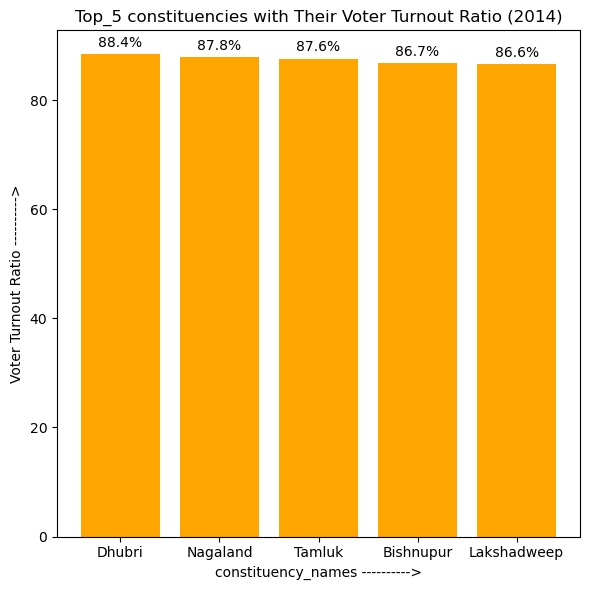

In [15]:
x=top_5['pc_name']
y=top_5['Voter_Turnout_Ratio']
fig, ax = plt.subplots(figsize=(6, 6))

bars = ax.bar(x, y, color='orange')
ax.set_title('Top_5 constituencies with Their Voter Turnout Ratio (2014)')
ax.set_ylabel('Voter Turnout Ratio ---------->')
ax.set_xlabel("constituency_names ---------->")
ax.bar_label(bars, fmt='%.1f%%', padding=3)
plt.tight_layout() 
plt.show()

In [16]:
print("constituencies with LOWEST voter turnout ratio in 2014:")
bottom_5=constituencies_2014.tail()
bottom_5

constituencies with LOWEST voter turnout ratio in 2014:


state      pc_name  total_electors  total_votes  Voter_Turnout  \
69             Bihar  Patna Sahib         1946249       882262       0.453314   
242      Maharashtra       Kalyan         1922034       824196       0.428814   
128  Jammu & Kashmir    Baramulla         1190766       465992       0.391338   
127  Jammu & Kashmir     Anantnag         1301143       375279       0.288423   
131  Jammu & Kashmir     Srinagar         1207230       312212       0.258618   

     Voter_Turnout_Ratio  
69             45.331404  
242            42.881447  
128            39.133801  
127            28.842256  
131            25.861849

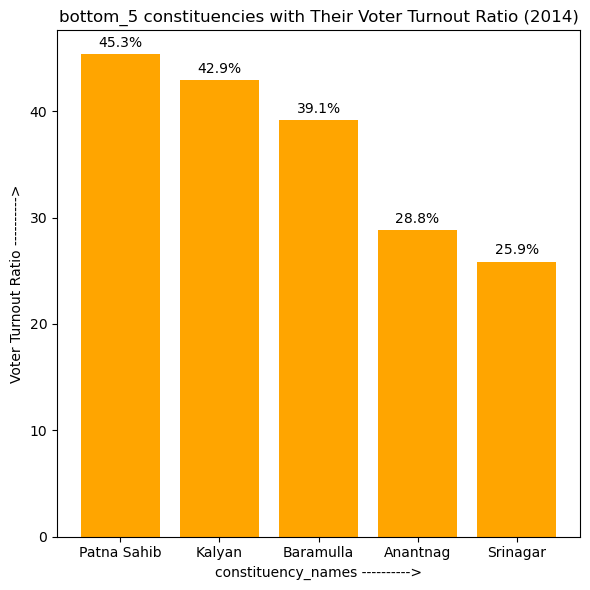

In [17]:
x=bottom_5['pc_name']
y=bottom_5['Voter_Turnout_Ratio']

fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(x, y, color='orange')
ax.set_title('bottom_5 constituencies with Their Voter Turnout Ratio (2014)')
ax.set_ylabel('Voter Turnout Ratio ---------->')
ax.set_xlabel("constituency_names ---------->")
ax.bar_label(bars, fmt='%.1f%%', padding=3)
plt.tight_layout() 
plt.show()

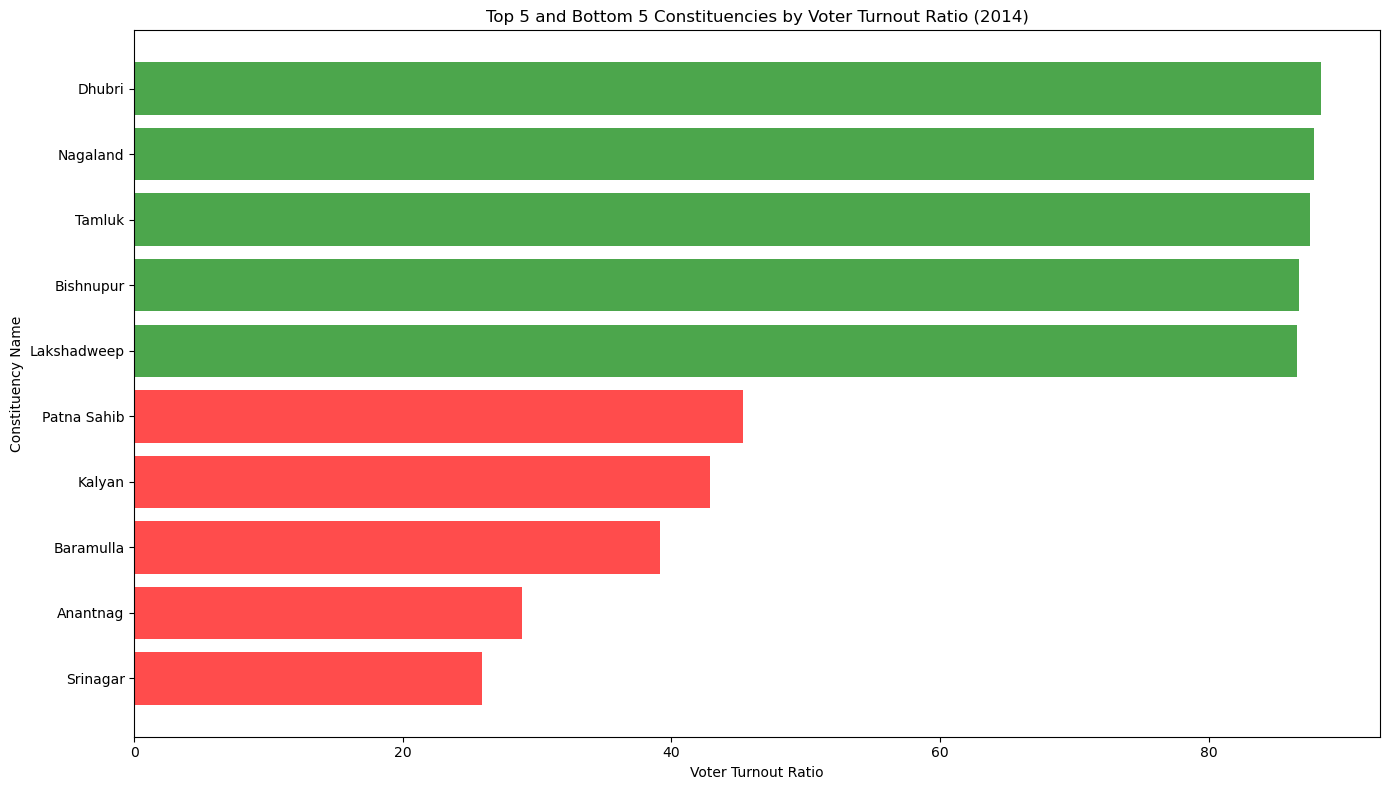

In [18]:
combined_data = pd.concat([top_5, bottom_5])

plt.figure(figsize=(14, 8))
plt.barh(combined_data['pc_name'], combined_data['Voter_Turnout_Ratio'], color=['green' if x in top_5['pc_name'].values else 'red' for x in combined_data['pc_name']], alpha=0.7)

plt.title('Top 5 and Bottom 5 Constituencies by Voter Turnout Ratio (2014)')
plt.xlabel('Voter Turnout Ratio')
plt.ylabel('Constituency Name')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [19]:
state_data = constituency_data_14.groupby(['state']).agg({'total_votes': 'sum','total_electors':'sum'}).reset_index()

state_data['Voter_Turnout'] = state_data['total_votes'] / state_data['total_electors']
state_data['Voter_Turnout_Ratio'] = state_data['Voter_Turnout'] * 100

print("year 2014")
print("state with HIGHEST voter turnout ratio in 2014 :")
state_2014=state_data.sort_values(by='Voter_Turnout_Ratio',ascending=False)
top_5=state_2014.head()
top_5

year 2014
state with HIGHEST voter turnout ratio in 2014 :


state  total_votes  total_electors  Voter_Turnout  \
22              Nagaland      1038910         1182972       0.878220   
16           Lakshadweep        43239           49922       0.866131   
30               Tripura      2023829         2388822       0.847208   
6   Dadra & Nagar Haveli       165286          196597       0.840735   
27                Sikkim       308967          370770       0.833312   

    Voter_Turnout_Ratio  
22            87.822028  
16            86.613116  
30            84.720795  
6             84.073511  
27            83.331176

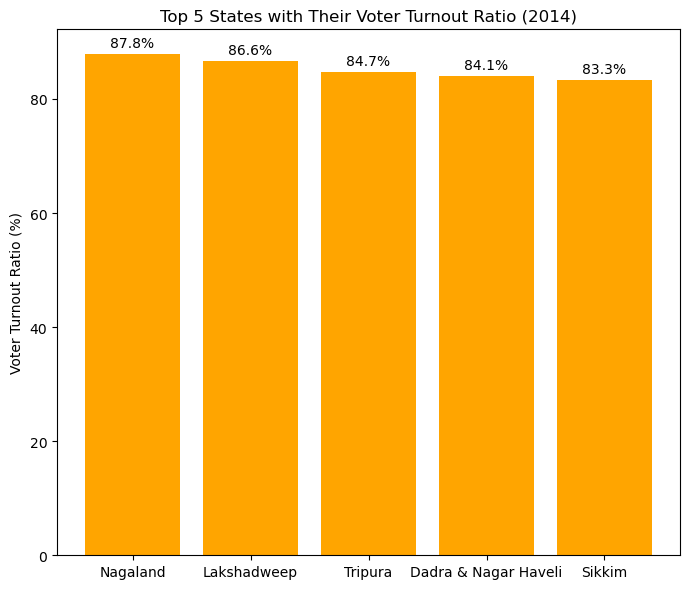

In [20]:
x = top_5['state']
y = top_5['Voter_Turnout_Ratio']
fig, ax = plt.subplots(figsize=(7, 6)) 
bars = ax.bar(x, y, color='orange')

ax.set_title('Top 5 States with Their Voter Turnout Ratio (2014)')
ax.set_ylabel('Voter Turnout Ratio (%)')
ax.bar_label(bars, fmt='%.1f%%', padding=3)
plt.tight_layout() 
plt.show()

In [21]:
print("state with LOWEST voter turnout ratio in 2014 :")
bottom_5=state_2014.tail()
bottom_5

state with LOWEST voter turnout ratio in 2014 :


state  total_votes  total_electors  Voter_Turnout  \
17   Madhya Pradesh     29639807        48121301       0.615939   
18      Maharashtra     48717419        80798823       0.602947   
31    Uttar Pradesh     81093120       138810557       0.584200   
4             Bihar     35885332        63800160       0.562465   
12  Jammu & Kashmir      3566863         7183129       0.496561   

    Voter_Turnout_Ratio  
17            61.593944  
18            60.294714  
31            58.419995  
4             56.246461  
12            49.656118

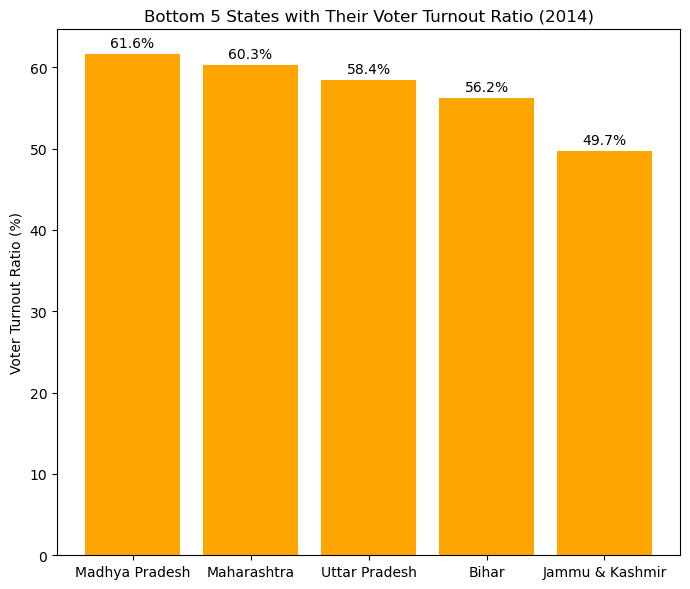

In [22]:
x=bottom_5['state']
y=bottom_5['Voter_Turnout_Ratio']
fig, ax = plt.subplots(figsize=(7, 6))

bars = ax.bar(x, y, color='orange')
ax.set_title('Bottom 5 States with Their Voter Turnout Ratio (2014)')
ax.set_ylabel('Voter Turnout Ratio (%)')
ax.bar_label(bars, fmt='%.1f%%', padding=3)
plt.tight_layout() 
plt.show()

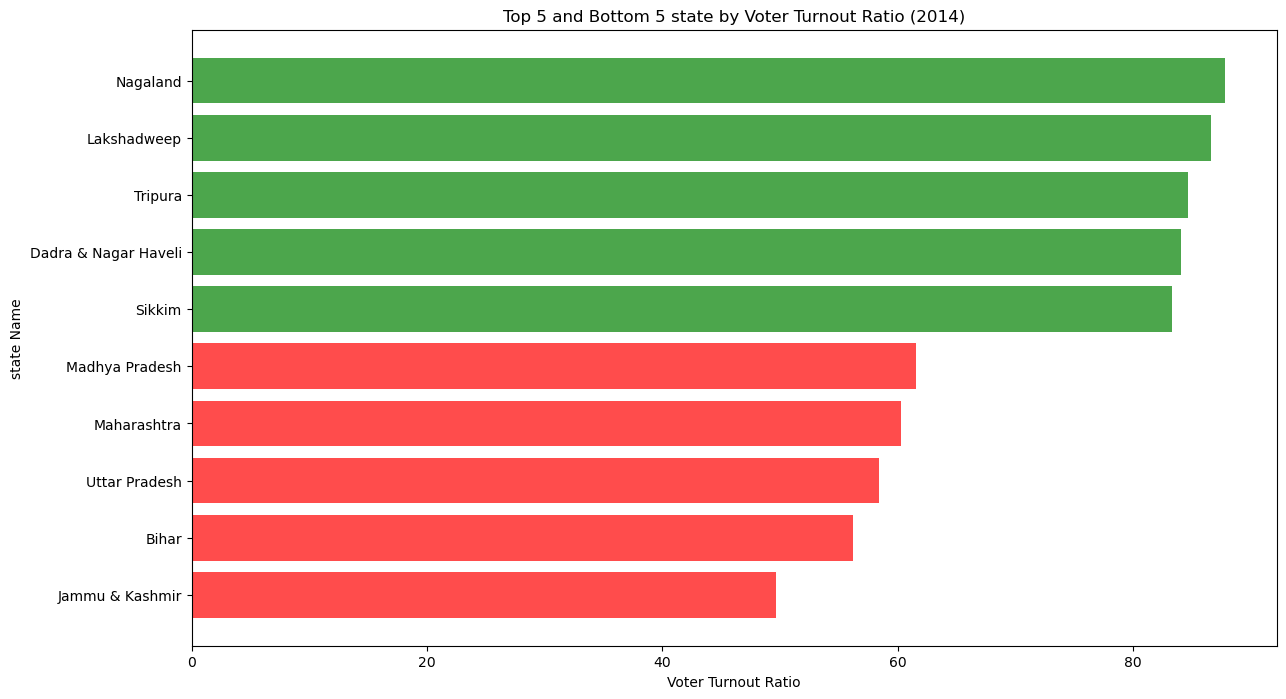

In [23]:
combined_data = pd.concat([top_5, bottom_5])
plt.figure(figsize=(14, 8))
plt.barh(combined_data['state'], combined_data['Voter_Turnout_Ratio'], color=['green' if x in top_5['state'].values else 'red' for x in combined_data['state']], alpha=0.7)
plt.title('Top 5 and Bottom 5 state by Voter Turnout Ratio (2014)')
plt.xlabel('Voter Turnout Ratio')
plt.ylabel('state Name')
plt.gca().invert_yaxis()


plt.show()

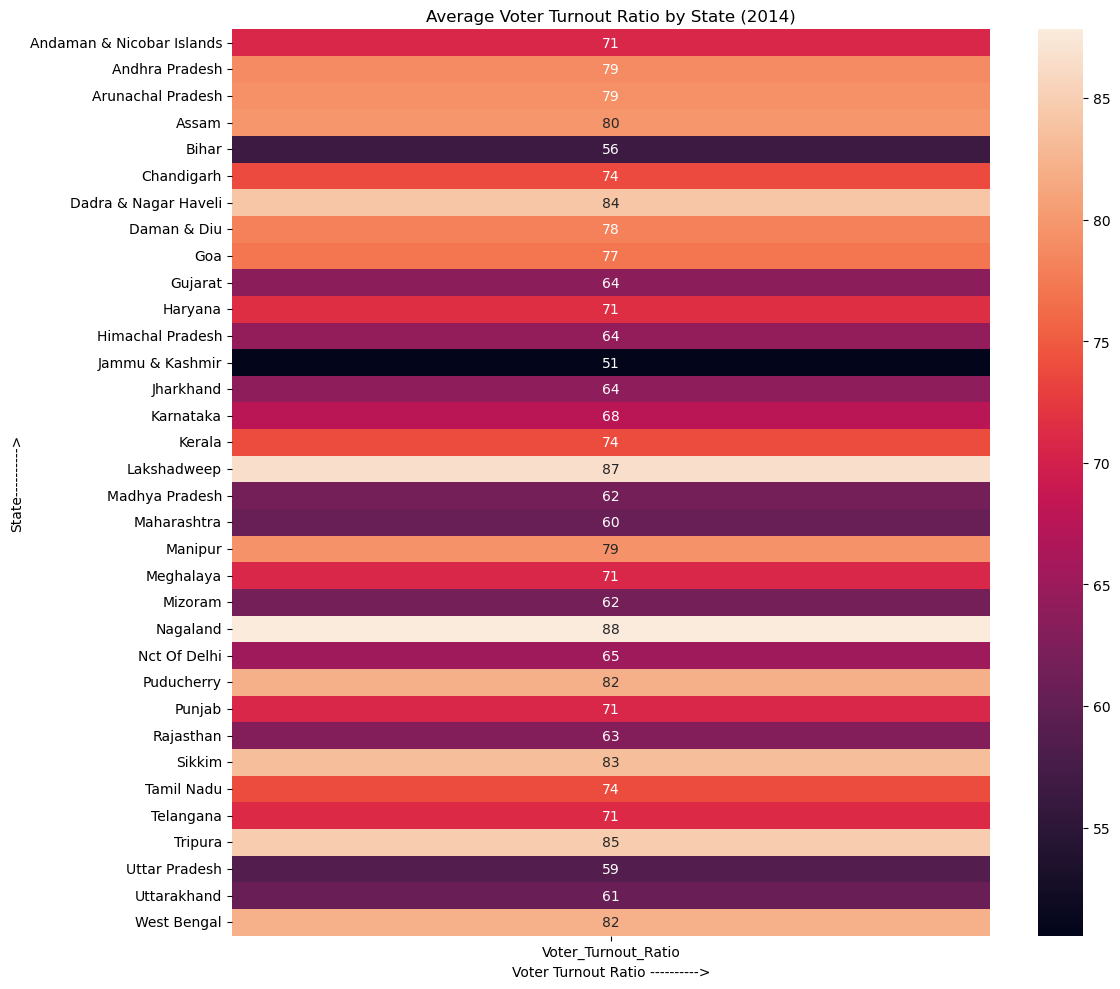

<Figure size 640x480 with 0 Axes>

In [24]:
pivot_table = constituency_data_14.pivot_table(index='state', values='Voter_Turnout_Ratio', aggfunc='mean')

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, cbar=True)

# Add title and labels
plt.title('Average Voter Turnout Ratio by State (2014)')
plt.xlabel('Voter Turnout Ratio ---------->')
plt.ylabel('State---------->')

# Show plot
plt.tight_layout()
plt.show()
plt.savefig('2014.png')

### YEAR 2019

VOTER_TURNOUT_RATIO ANALYSIS OF STATE AND CONSTITUENCIES

In [25]:
constituency_data_19 = election_data_2019.groupby(['state', 'pc_name', 'total_electors']).agg({'total_votes': 'sum'}).reset_index()
constituency_data_19['Voter_Turnout'] = constituency_data_19['total_votes'] / constituency_data_19['total_electors']
constituency_data_19['Voter_Turnout_Ratio'] = constituency_data_19['Voter_Turnout'] * 100
print("year 2019")
print("constituencies with HIGHEST voter turnout ratio in 2019:")
constituencies_2019=constituency_data_19.sort_values(by='Voter_Turnout_Ratio',ascending=False)
top_5=constituencies_2019.head()
top_5

year 2019
constituencies with HIGHEST voter turnout ratio in 2019:


state         pc_name  total_electors  total_votes  \
30               Assam          Dhubri         1858566      1685005   
514        West Bengal       Bishnupur         1627199      1420648   
29               Assam         Barpeta         1685149      1458549   
524        West Bengal      Jalpaiguri         1735464      1500922   
26   Arunachal Pradesh  Arunachal East          339788       293781   

     Voter_Turnout  Voter_Turnout_Ratio  
30        0.906616            90.661564  
514       0.873063            87.306347  
29        0.865531            86.553118  
524       0.864853            86.485343  
26        0.864601            86.460087

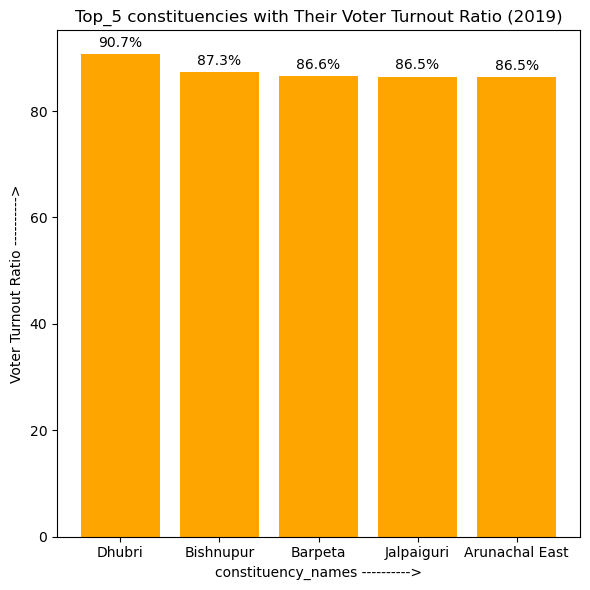

In [26]:
x=top_5['pc_name']
y=top_5['Voter_Turnout_Ratio']
fig, ax = plt.subplots(figsize=(6, 6))

bars = ax.bar(x, y, color='orange')
ax.set_title('Top_5 constituencies with Their Voter Turnout Ratio (2019)')
ax.set_ylabel('Voter Turnout Ratio ---------->')
ax.set_xlabel("constituency_names ---------->")
ax.bar_label(bars, fmt='%.1f%%', padding=3)
plt.tight_layout() 
plt.show()

In [27]:
print("constituencies with LOWEST voter turnout ratio in 2019:")
bottom_5=constituencies_2019.tail()
bottom_5

constituencies with LOWEST voter turnout ratio in 2019:


state    pc_name  total_electors  total_votes  Voter_Turnout  \
253      Maharashtra     Kalyan         1965676       890313       0.452930   
400        Telangana  Hyderabad         1957931       877872       0.448367   
139  Jammu & Kashmir  Baramulla         1317738       455550       0.345706   
142  Jammu & Kashmir   Srinagar         1294671       186832       0.144308   
138  Jammu & Kashmir   Anantnag         1397779       124896       0.089353   

     Voter_Turnout_Ratio  
253            45.292968  
400            44.836718  
139            34.570605  
142            14.430848  
138             8.935318

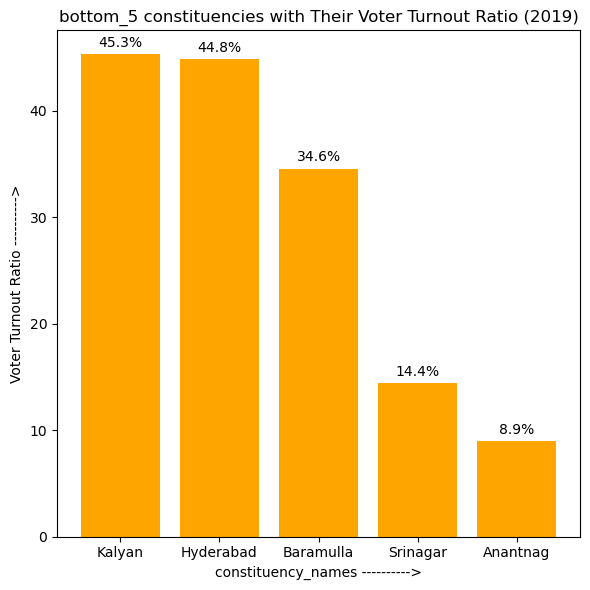

In [28]:
x=bottom_5['pc_name']
y=bottom_5['Voter_Turnout_Ratio']
fig, ax = plt.subplots(figsize=(6, 6))

bars = ax.bar(x, y, color='orange')
ax.set_title('bottom_5 constituencies with Their Voter Turnout Ratio (2019)')
ax.set_ylabel('Voter Turnout Ratio ---------->')
ax.set_xlabel("constituency_names ---------->")
ax.bar_label(bars, fmt='%.1f%%', padding=3)
plt.tight_layout() 
plt.show()

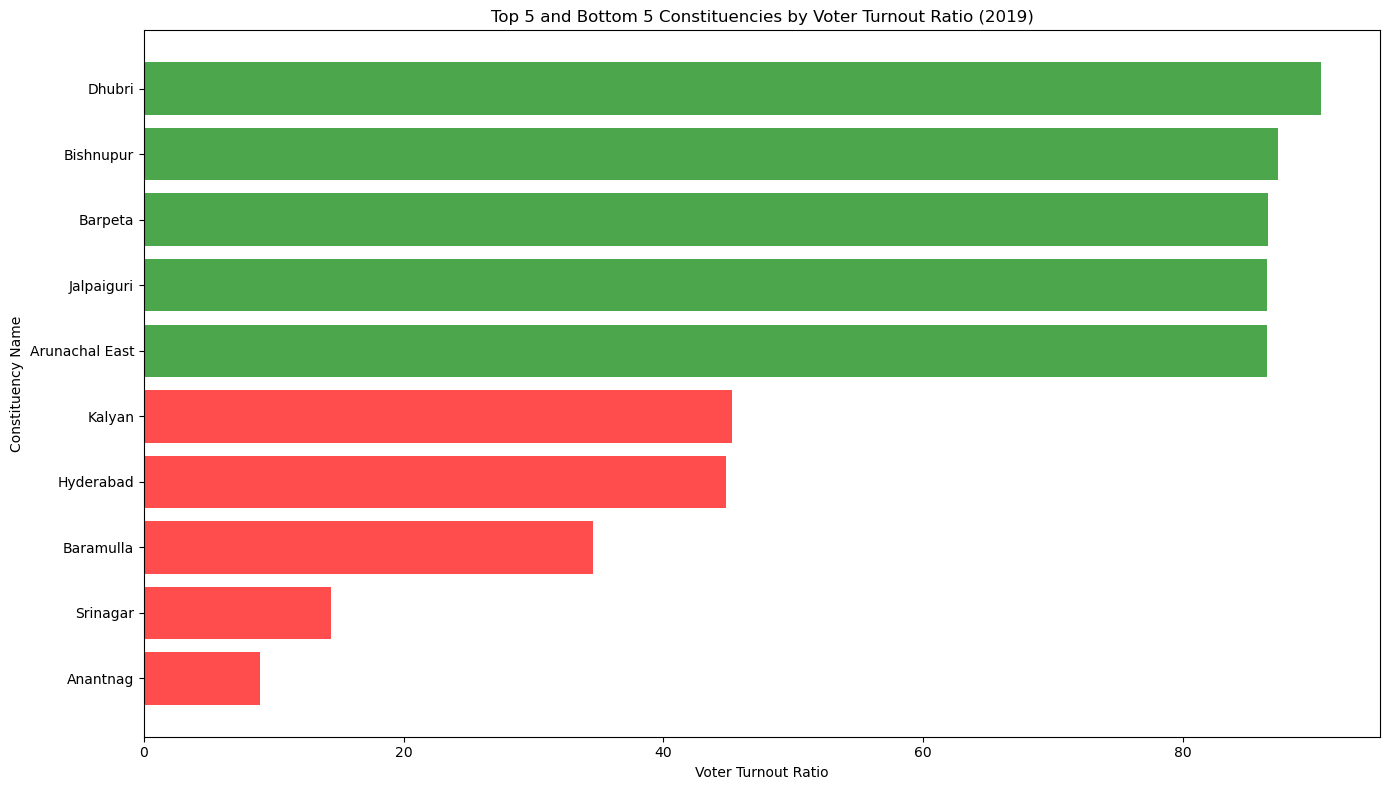

In [29]:
combined_data = pd.concat([top_5, bottom_5])

# Plot
plt.figure(figsize=(14, 8))
plt.barh(combined_data['pc_name'], combined_data['Voter_Turnout_Ratio'], color=['green' if x in top_5['pc_name'].values else 'red' for x in combined_data['pc_name']], alpha=0.7)

# Add title and labels
plt.title('Top 5 and Bottom 5 Constituencies by Voter Turnout Ratio (2019)')
plt.xlabel('Voter Turnout Ratio')
plt.ylabel('Constituency Name')

# Invert y-axis to have the highest at the top
plt.gca().invert_yaxis()

# Show plot
plt.tight_layout()
plt.show()

In [30]:
state_data= constituency_data_19.groupby(['state']).agg({'total_votes': 'sum','total_electors':'sum'}).reset_index()
state_data['Voter_Turnout'] = state_data['total_votes'] / state_data['total_electors']
state_data['Voter_Turnout_Ratio'] = state_data['Voter_Turnout'] * 100
print("year 2019")
print("state with HIGHEST voter turnout ratio in 2019:")
state_2019=state_data.sort_values(by='Voter_Turnout_Ratio',ascending=False)
top_5=state_2019.head()
top_5

year 2019
state with HIGHEST voter turnout ratio in 2019:


state  total_votes  total_electors  Voter_Turnout  \
17  Lakshadweep        47009           55189       0.851782   
23     Nagaland      1006357         1213777       0.829112   
20      Manipur      1617330         1959563       0.825352   
32      Tripura      2153172         2614718       0.823482   
35  West Bengal     57206976        70001284       0.817228   

    Voter_Turnout_Ratio  
17            85.178206  
23            82.911194  
20            82.535239  
32            82.348154  
35            81.722752

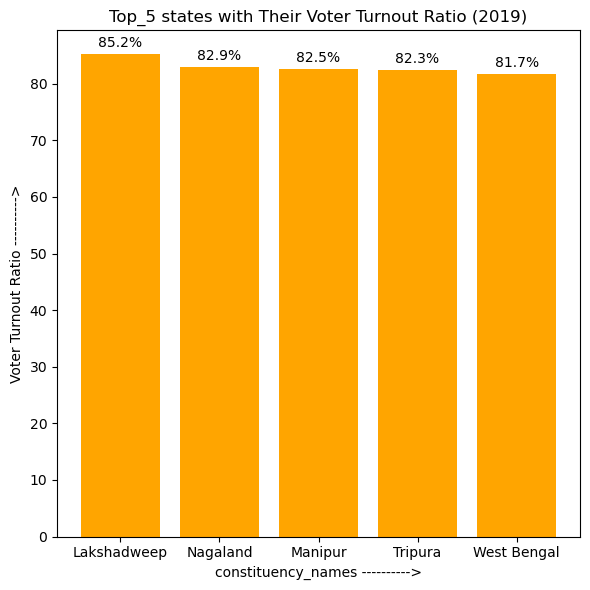

In [31]:
x=top_5['state']
y=top_5['Voter_Turnout_Ratio']
fig, ax = plt.subplots(figsize=(6, 6))

bars = ax.bar(x, y, color='orange')
ax.set_title('Top_5 states with Their Voter Turnout Ratio (2019)')
ax.set_ylabel('Voter Turnout Ratio ---------->')
ax.set_xlabel("constituency_names ---------->")
ax.bar_label(bars, fmt='%.1f%%', padding=3)
plt.tight_layout() 
plt.show()

In [32]:
print("state with LOWEST voter turnout ratio in 2019:")
state_2019=state_data.sort_values(by='Voter_Turnout_Ratio',ascending=False)
bottom_5=state_2019.tail()
bottom_5

state with LOWEST voter turnout ratio in 2019:


state  total_votes  total_electors  Voter_Turnout  \
19      Maharashtra     54054245        88676946       0.609564   
24     Nct Of Delhi      8679012        14327649       0.605753   
33    Uttar Pradesh     86481398       146134603       0.591793   
4             Bihar     40806661        71216290       0.572996   
13  Jammu & Kashmir      3552622         7922538       0.448420   

    Voter_Turnout_Ratio  
19            60.956367  
24            60.575270  
33            59.179275  
4             57.299616  
13            44.841969

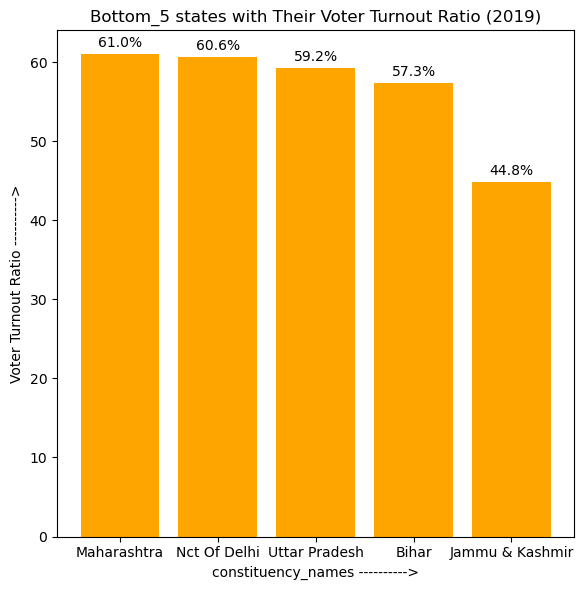

In [33]:
x=bottom_5['state']
y=bottom_5['Voter_Turnout_Ratio']
fig, ax = plt.subplots(figsize=(6, 6))

bars = ax.bar(x, y, color='orange')
ax.set_title('Bottom_5 states with Their Voter Turnout Ratio (2019)')
ax.set_ylabel('Voter Turnout Ratio ---------->')
ax.set_xlabel("constituency_names ---------->")
ax.bar_label(bars, fmt='%.1f%%', padding=3)
plt.tight_layout() 
plt.show()

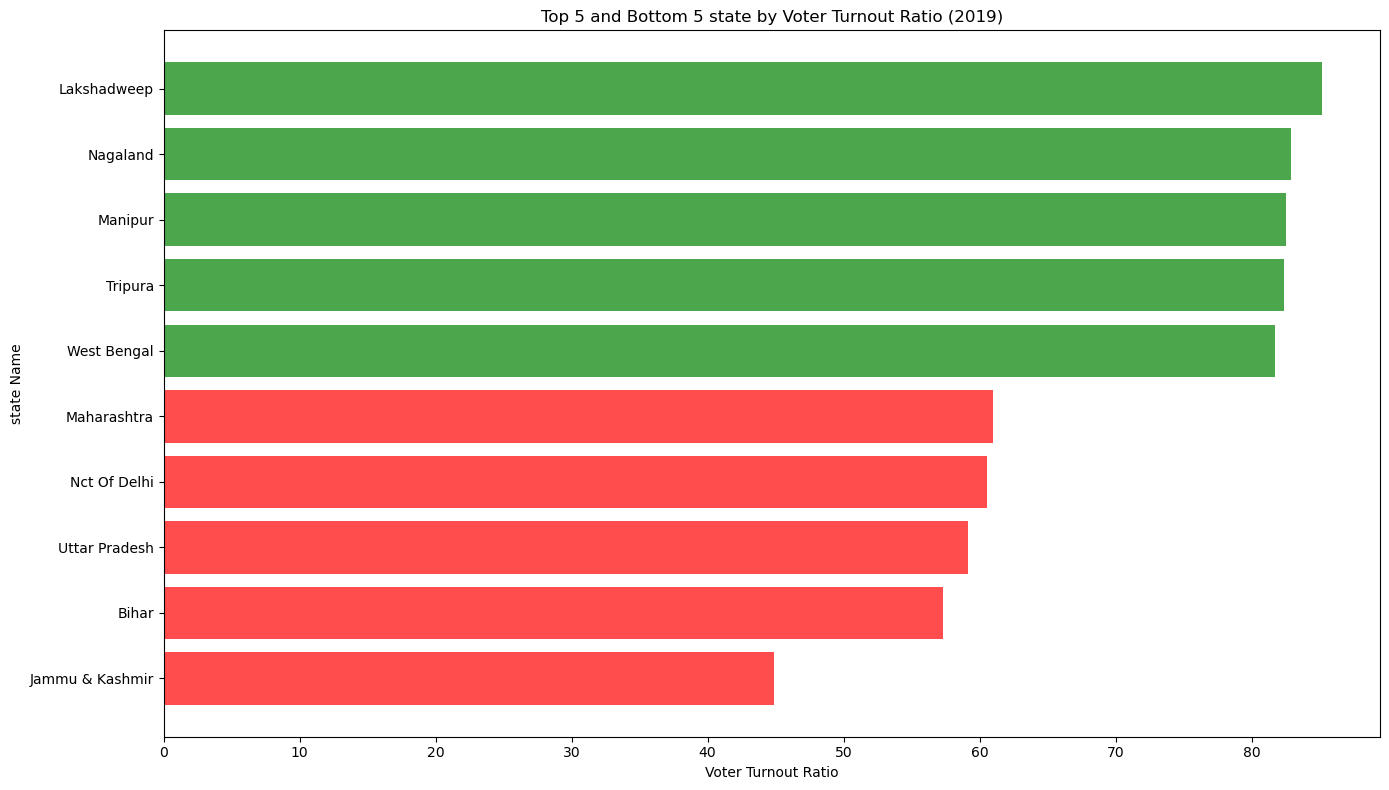

In [34]:
combined_data = pd.concat([top_5, bottom_5])

# Plot
plt.figure(figsize=(14, 8))
plt.barh(combined_data['state'], combined_data['Voter_Turnout_Ratio'], color=['green' if x in top_5['state'].values else 'red' for x in combined_data['state']], alpha=0.7)

# Add title and labels
plt.title('Top 5 and Bottom 5 state by Voter Turnout Ratio (2019)')
plt.xlabel('Voter Turnout Ratio')
plt.ylabel('state Name')

# Invert y-axis to have the highest at the top
plt.gca().invert_yaxis()

# Show plot
plt.tight_layout()
plt.show()

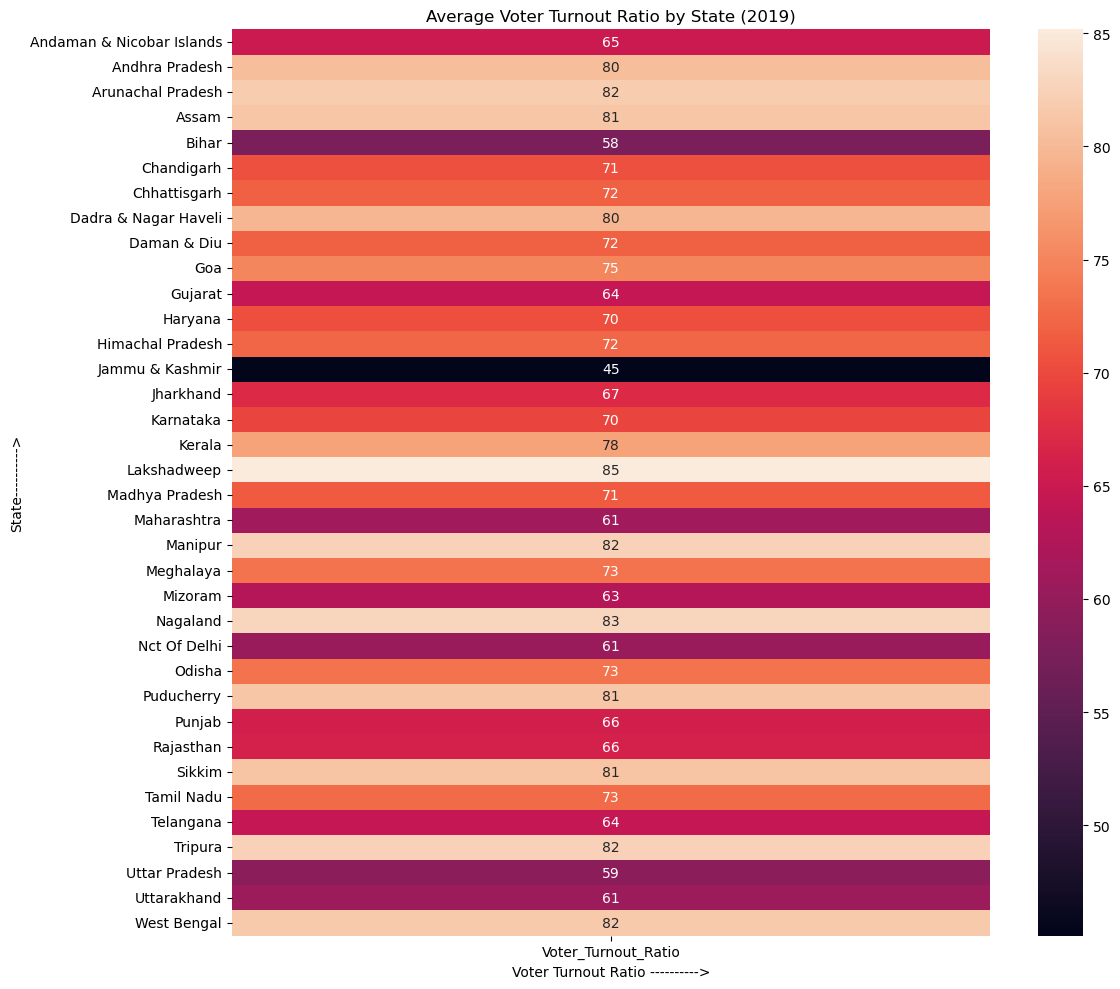

<Figure size 640x480 with 0 Axes>

In [35]:
pivot_table = constituency_data_19.pivot_table(index='state', values='Voter_Turnout_Ratio', aggfunc='mean')

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, cbar=True)

# Add title and labels
plt.title('Average Voter Turnout Ratio by State (2019)')
plt.xlabel('Voter Turnout Ratio ---------->')
plt.ylabel('State---------->')

# Show plot
plt.tight_layout()
plt.show()
plt.savefig('2019.pdf')

### merged(2014&2019)

ANALYSIS OF (2014&2019) DATA

In [36]:
election_data=pd.merge(election_data_2019,election_data_2014,on=['state','pc_name'],how="outer", suffixes=('_2019', '_2014'))
election_data.head(3)

state pc_name       candidate_2019 sex_2019  age_2019  \
0  Andhra Pradesh   Aruku  Kishore Chandra Deo     Male      72.0   
1  Andhra Pradesh   Aruku  Kishore Chandra Deo     Male      72.0   
2  Andhra Pradesh   Aruku  Kishore Chandra Deo     Male      72.0   

  category_2019 party_2019 party_symbol_2019  general_votes_2019  \
0            St        Tdp           Bicycle              336163   
1            St        Tdp           Bicycle              336163   
2            St        Tdp           Bicycle              336163   

   postal_votes_2019  ...       candidate_2014  sex_2014 age_2014  \
0               1938  ...  Kishore Chandra Deo         M     67.0   
1               1938  ...  Gummidi Sandhyarani         F     41.0   
2               1938  ...      Midiyam Baburao         M     63.0   

  category_2014  party_2014        party_symbol_2014 general_votes_2014  \
0            St         Inc                     Hand            52574.0   
1            St         Tdp                  Bicycle           319846.0   
2            St         Cpm  Hammer, Sickle And Star            38254.0   

  postal_votes_2014  total_votes_2014  total_electors_2014  
0             310.0           52884.0            1272340.0  
1            1947.0          321793.0            1272340.0  
2             644.0           38898.0            1272340.0  

[3 rows x 22 columns]

In [37]:
election_data=election_data.drop(columns=["sex_2019","age_2019","sex_2014","age_2014","party_symbol_2014","party_symbol_2019"])
election_data.head(3)

state pc_name       candidate_2019 category_2019 party_2019  \
0  Andhra Pradesh   Aruku  Kishore Chandra Deo            St        Tdp   
1  Andhra Pradesh   Aruku  Kishore Chandra Deo            St        Tdp   
2  Andhra Pradesh   Aruku  Kishore Chandra Deo            St        Tdp   

   general_votes_2019  postal_votes_2019  total_votes_2019  \
0              336163               1938            338101   
1              336163               1938            338101   
2              336163               1938            338101   

   total_electors_2019       candidate_2014 category_2014 party_2014  \
0              1451418  Kishore Chandra Deo            St        Inc   
1              1451418  Gummidi Sandhyarani            St        Tdp   
2              1451418      Midiyam Baburao            St        Cpm   

   general_votes_2014  postal_votes_2014  total_votes_2014  \
0             52574.0              310.0           52884.0   
1            319846.0             1947.0          321793.0   
2             38254.0              644.0           38898.0   

   total_electors_2014  
0            1272340.0  
1            1272340.0  
2            1272340.0

In [38]:
print("rows and columns in election_data are:\t",election_data.shape)
election_data.nunique()

rows and columns in election_data are:	 (147990, 16)


state                    36
pc_name                 540
candidate_2019         7810
category_2019             3
party_2019              674
general_votes_2019     6233
postal_votes_2019      1227
total_votes_2019       6246
total_electors_2019     543
candidate_2014         7563
category_2014             3
party_2014              453
general_votes_2014     6434
postal_votes_2014       796
total_votes_2014       6476
total_electors_2014     510
dtype: int64

In [39]:
election_data.columns

Index(['state', 'pc_name', 'candidate_2019', 'category_2019', 'party_2019',
       'general_votes_2019', 'postal_votes_2019', 'total_votes_2019',
       'total_electors_2019', 'candidate_2014', 'category_2014', 'party_2014',
       'general_votes_2014', 'postal_votes_2014', 'total_votes_2014',
       'total_electors_2014'],
      dtype='object')

### which constituencies have elected same party for two consecutive elctions,rank themby % of votes to that winning party in 2019

In [40]:
df_same_party = election_data[election_data['party_2014'] == election_data['party_2019']]

# Calculating the percentage of votes for the winning party in 2014 and 2019
df_same_party['vote_percentage_2014'] = (df_same_party['total_votes_2014'] / df_same_party['total_electors_2014'])* 100
df_same_party['vote_percentage_2019'] = (df_same_party['total_votes_2019'] / df_same_party['total_electors_2019'])* 100

# Calculating the difference in vote percentage between 2019 and 2014
df_same_party['vote_percentage_difference'] = df_same_party['vote_percentage_2019'] - df_same_party['vote_percentage_2014']

# Removing duplicate rows based on 'state', 'pc_name', and 'party_2014'
df_unique_same_party = df_same_party.drop_duplicates(subset=['state', 'pc_name', 'party_2014'])

# Ranking the constituencies by the difference in vote percentage
df_ranked = df_unique_same_party.sort_values(by='vote_percentage_difference', ascending=False)
df_ranked['rank'] = df_ranked['vote_percentage_difference'].rank(ascending=False)
# Selecting relevant columns
df_result = df_ranked[['state', 'pc_name', 'party_2014','party_2019', 'vote_percentage_2014', 'vote_percentage_2019', 'vote_percentage_difference','rank']]
df_result

C:\Users\user\AppData\Local\Temp\ipykernel_5668\2239903120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_party['vote_percentage_2014'] = (df_same_party['total_votes_2014'] / df_same_party['total_electors_2014'])* 100
C:\Users\user\AppData\Local\Temp\ipykernel_5668\2239903120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_party['vote_percentage_2019'] = (df_same_party['total_votes_2019'] / df_same_party['total_electors_2019'])* 100
C:\Users\user\AppData\Local\Temp\ipykernel_5668\22

state                    pc_name  party_2014  \
92915                  Tamil Nadu                      Karur         Inc   
88425                  Tamil Nadu                      Arani         Inc   
102861                    Tripura               Tripura West         Bjp   
94009                  Tamil Nadu            Tiruchirappalli         Inc   
87223                  Tamil Nadu                Krishnagiri         Inc   
81651                  Tamil Nadu                Thiruvallur         Inc   
130292                  Jharkhand                    Giridih       Ajsup   
127550                West Bengal                    Purulia         Bjp   
41191                      Kerala                   Vadakara        Cpim   
41033                      Kerala                     Kannur        Cpim   
103095                    Tripura               Tripura East         Bjp   
96370                  Tamil Nadu               Nagapattinam         Cpi   
141658                  Telangana                    Khammam         Trs   
91351                  Tamil Nadu                   Tiruppur         Cpi   
7326                        Bihar              Valmiki Nagar       Jd(U)   
124145                West Bengal                   Ranaghat         Bjp   
127302                West Bengal                   Jhargram         Bjp   
94752                  Tamil Nadu                 Perambalur         Dmk   
122369                West Bengal                 Jalpaiguri         Bjp   
91824                  Tamil Nadu                 Coimbatore        Cpim   
96676                  Tamil Nadu                  Sivaganga         Inc   
127427                West Bengal                  Medinipur         Bjp   
99129                  Tamil Nadu               Virudhunagar         Inc   
127151                West Bengal                     Kanthi         Bjp   
128005                West Bengal                  Bishnupur         Bjp   
127231                West Bengal                     Ghatal         Bjp   
6882                        Assam                   Kaliabor         Agp   
42533                      Kerala                  Chalakudy        Cpim   
125123                West Bengal                 Mathurapur         Bjp   
9962                        Bihar                    Katihar       Jd(U)   
126943                West Bengal                   Arambagh         Bjp   
122152                West Bengal                Cooch Behar         Bjp   
85964                  Tamil Nadu                  Arakkonam         Dmk   
8362                        Bihar                  Sitamarhi       Jd(U)   
13952                       Bihar                  Bhagalpur       Jd(U)   
43172                      Kerala                   Kottayam        Cpim   
104689              Uttar Pradesh                     Amroha         Bsp   
127026                West Bengal                     Tamluk         Bjp   
42790                      Kerala                  Ernakulam        Cpim   
40570                   Karnataka                      Kolar         Bjp   
87492                  Tamil Nadu                 Dharmapuri         Dmk   
89000                  Tamil Nadu               Kallakurichi         Dmk   
102498                 Tamil Nadu              Kanniyakumari         Inc   
12009                       Bihar             Gopalganj (Sc)       Jd(U)   
6030                        Assam                    Barpeta         Agp   
124251                West Bengal                    Bangaon         Bjp   
126870                West Bengal                    Hooghly         Bjp   
132245                  Jharkhand                  Singhbhum         Inc   
127792                West Bengal                    Bankura         Bjp   
147467                 Puducherry                 Puducherry         Inc   
90196                  Tamil Nadu                   Namakkal         Dmk   
36268                   Karnataka          Udupi Chikmagalur       Jd(S)   


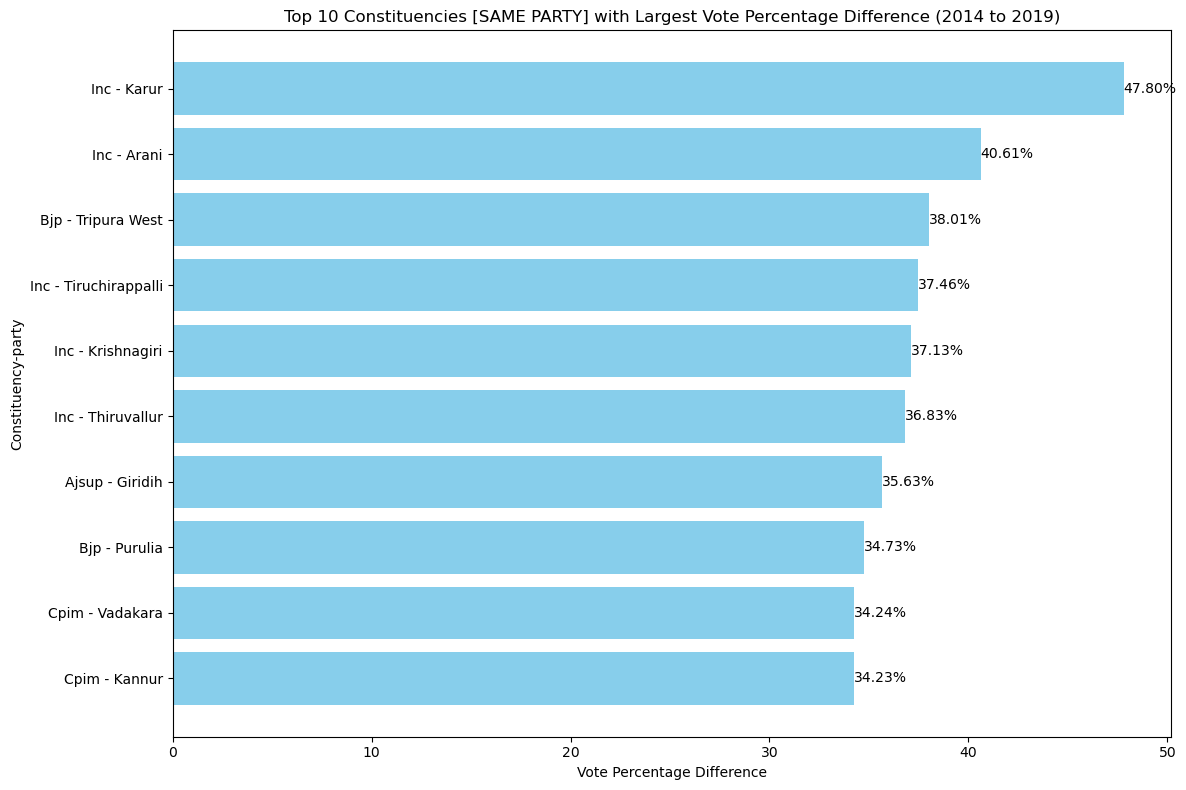

In [41]:
top_10_gainers = df_result.head(10)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_gainers['party_2014'] + ' - ' + top_10_gainers['pc_name'], top_10_gainers['vote_percentage_difference'], color='skyblue')
plt.xlabel('Vote Percentage Difference')
plt.ylabel('Constituency-party')
plt.title('Top 10 Constituencies [SAME PARTY] with Largest Vote Percentage Difference (2014 to 2019)')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

### which constituencies elected for different parties in two elections(list top 10 based on difference(2019-2014)in winner vote percentage in two elections)

In [42]:
df_different_party = election_data[election_data['party_2014'] != election_data['party_2019']]
df_different_party['vote_percentage_2014'] = (df_different_party['total_votes_2014']) / df_different_party['total_electors_2014'] * 100
df_different_party['vote_percentage_2019'] = (df_different_party['total_votes_2019']) / df_different_party['total_electors_2019'] * 100
df_different_party['vote_percentage_difference'] = df_different_party['vote_percentage_2019'] - df_different_party['vote_percentage_2014']
df_ranked = df_different_party.sort_values(by='vote_percentage_difference', ascending=False).head(10)
df_ranked['rank'] = df_ranked['vote_percentage_difference'].rank(ascending=False)
df_result = df_ranked[['pc_name', 'party_2014', 'party_2019', 'vote_percentage_2014', 'vote_percentage_2019', 'vote_percentage_difference','rank']]
print("top_10 constituencies elected for different parties in two elections")
df_result.head(10)


top_10 constituencies elected for different parties in two elections


C:\Users\user\AppData\Local\Temp\ipykernel_5668\1204873864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_different_party['vote_percentage_2014'] = (df_different_party['total_votes_2014']) / df_different_party['total_electors_2014'] * 100
C:\Users\user\AppData\Local\Temp\ipykernel_5668\1204873864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_different_party['vote_percentage_2019'] = (df_different_party['total_votes_2019']) / df_different_party['total_electors_2019'] * 100
C:\Users\user\AppD

pc_name party_2014 party_2019  vote_percentage_2014  \
41363      Wayanad       Aitc        Inc              0.059308   
41371      Wayanad        Ind        Inc              0.088361   
41364      Wayanad       Cpim        Inc              0.097805   
41367      Wayanad        Ind        Inc              0.104689   
41358      Wayanad        Bsp        Inc              0.105409   
41368      Wayanad        Ind        Inc              0.121416   
41370      Wayanad        Ind        Inc              0.228506   
41369      Wayanad        Ind        Inc              0.438283   
49012  Hoshangabad        Ggp        Bjp              0.333183   
41362      Wayanad       Aaap        Inc              0.855117   

       vote_percentage_2019  vote_percentage_difference  rank  
41363             51.951012                   51.891704   1.0  
41371             51.951012                   51.862651   2.0  
41364             51.951012                   51.853207   3.0  
41367             51.951012                   51.846323   4.0  
41358             51.951012                   51.845603   5.0  
41368             51.951012                   51.829596   6.0  
41370             51.951012                   51.722506   7.0  
41369             51.951012                   51.512729   8.0  
49012             51.456884                   51.123701   9.0  
41362             51.951012                   51.095895  10.0

### top 5 candidates based on margin difference  with runners in 2014 

In [43]:
def calculate_margin(group):
    # Sort the group by total_votes in descending order
    sorted_group = group.sort_values(by='total_votes', ascending=False)
    
    # Get the top two candidates (winner and runner-up)
    winner = sorted_group.iloc[0]
    runner_up = sorted_group.iloc[1]
    
    
    margin = winner['total_votes'] - runner_up['total_votes']
    
    return pd.Series({
        'pc_name': winner['pc_name'],
        'winner': winner['candidate'],
        'winner_votes': winner['total_votes'],
        'runner_up': runner_up['candidate'],
        'runner_up_votes': runner_up['total_votes'],
        'margin_difference': margin
    })


margin_data = election_data_2014.groupby('pc_name').apply(calculate_margin).reset_index(drop=True)


top_5_margins = margin_data.sort_values(by='margin_difference', ascending=False).head(5)

print("year_2014")
top_5_margins

year_2014


pc_name                   winner  winner_votes  \
490   Vadodara            Narendra Modi        845464   
175  Ghaziabad        Vijay Kumar Singh        758482   
354    Navsari              C. R. Patil        820831   
212     Jaipur         Ramcharan Bohara        863358   
457      Surat  Darshana Vikram Jardosh        718412   

                         runner_up  runner_up_votes  margin_difference  
490       Mistri Madhusudan Devram           275336             570128  
175                     Raj Babbar           191222             567260  
354                   Maksud Mirza           262715             558116  
212               Dr. Mahesh Joshi           324013             539345  
457  Desai Naishadhbhai Bhupatbhai           185222             533190

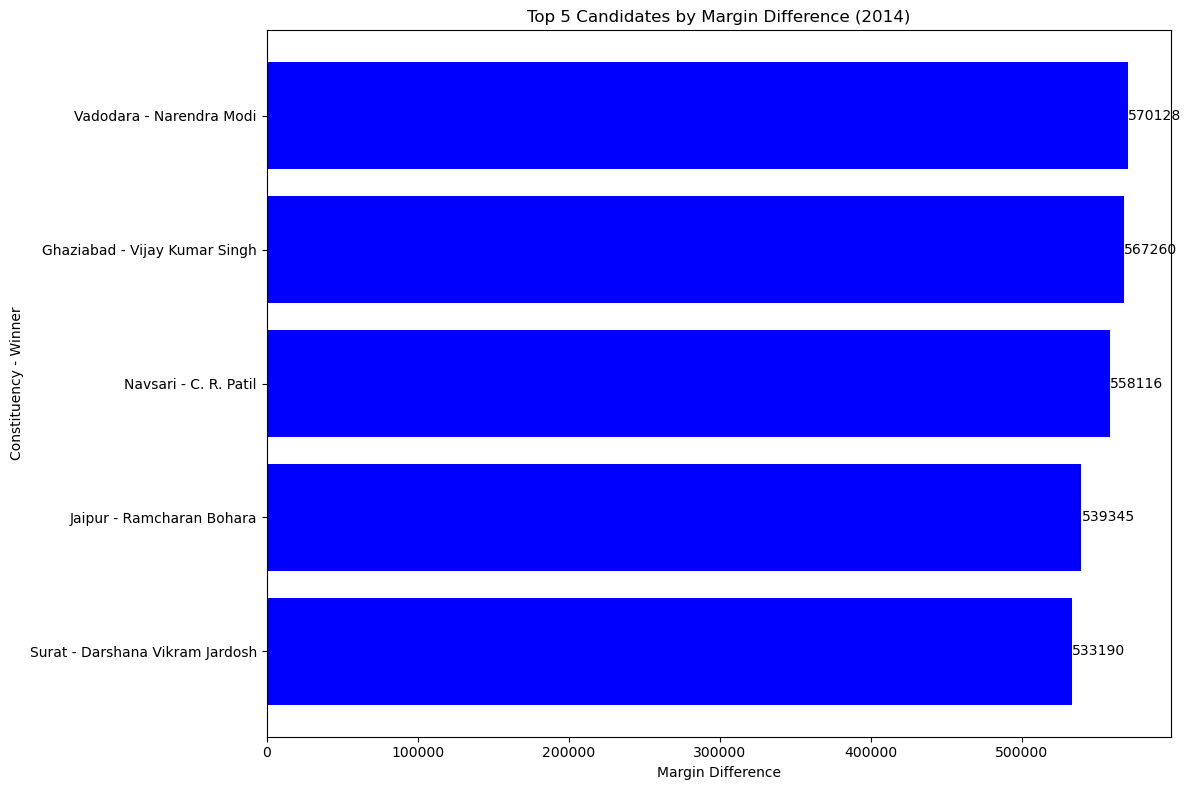

In [44]:
top_5_margins['label'] = top_5_margins['pc_name'] + ' - ' + top_5_margins['winner']

plt.figure(figsize=(12, 8))
plt.barh(top_5_margins['label'], top_5_margins['margin_difference'], color='b')

for index, value in enumerate(top_5_margins['margin_difference']):
    plt.text(value, index, f'{value}', va='center', ha='left')

plt.xlabel('Margin Difference')
plt.ylabel('Constituency - Winner')
plt.title('Top 5 Candidates by Margin Difference (2014)')
plt.tight_layout()
plt.gca().invert_yaxis()  
plt.show()

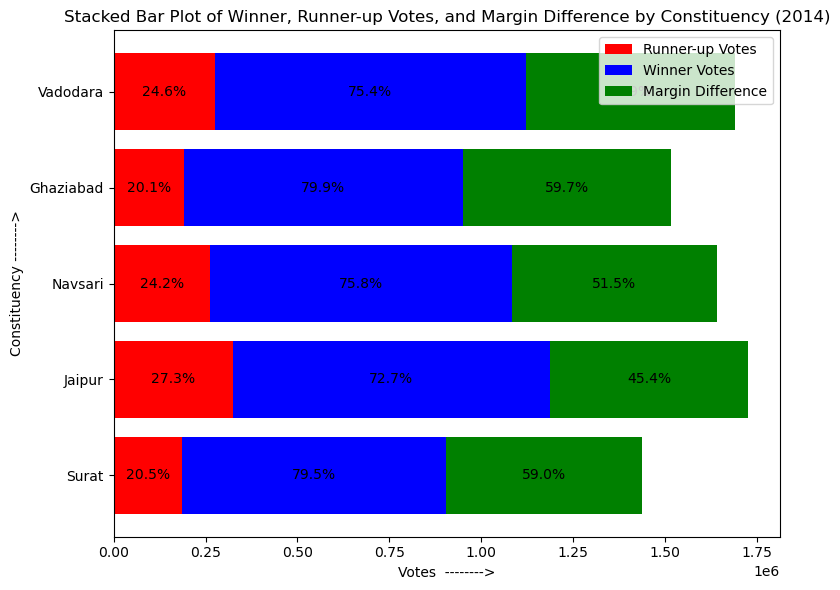

In [45]:
plt.figure(figsize=(8,6))
p1 = plt.barh(top_5_margins['pc_name'], top_5_margins['runner_up_votes'], color='r', label='Runner-up Votes')
p2 = plt.barh(top_5_margins['pc_name'], top_5_margins['winner_votes'], color='b', left=top_5_margins['runner_up_votes'], label='Winner Votes')
p3 = plt.barh(top_5_margins['pc_name'], top_5_margins['margin_difference'], color='g', left=top_5_margins['runner_up_votes'] + top_5_margins['winner_votes'], label='Margin Difference')

# Add labels and title
plt.ylabel('Constituency -------->')
plt.xlabel('Votes  -------->')
plt.title('Stacked Bar Plot of Winner, Runner-up Votes, and Margin Difference by Constituency (2014)')
plt.legend()

# Add percentage annotations on each bar
for _, row in top_5_margins.iterrows():
    runner_up_percentage = (row['runner_up_votes'] / (row['runner_up_votes'] + row['winner_votes'])) * 100
    winner_percentage = (row['winner_votes'] / (row['runner_up_votes'] + row['winner_votes'])) * 100
    margin_percentage = (row['margin_difference'] / (row['runner_up_votes'] + row['winner_votes'])) * 100
    plt.text(row['runner_up_votes'] / 2, row['pc_name'], f'{runner_up_percentage:.1f}%', ha='center', va='center')
    plt.text(row['runner_up_votes'] + row['winner_votes'] / 2, row['pc_name'], f'{winner_percentage:.1f}%', ha='center', va='center')
    plt.text(row['runner_up_votes'] + row['winner_votes'] + row['margin_difference'] / 2, row['pc_name'], f'{margin_percentage:.1f}%', ha='center', va='center')

# Show plot
plt.tight_layout()
plt.gca().invert_yaxis()  
plt.show()

### top 5 candidates based on margin difference with runners in 2019

In [46]:
def calculate_margin(group):
    # Sort the group by total_votes in descending order
    sorted_group = group.sort_values(by='total_votes', ascending=False)
    
    # Get the top two candidates (winner and runner-up)
    winner = sorted_group.iloc[0]
    runner_up = sorted_group.iloc[1]
    
    # Calculate the margin difference
    margin = winner['total_votes'] - runner_up['total_votes']
    
    return pd.Series({
        'pc_name': winner['pc_name'],
        'winner': winner['candidate'],
        'winner_votes': winner['total_votes'],
        'runner_up': runner_up['candidate'],
        'runner_up_votes': runner_up['total_votes'],
        'margin_difference': margin
    })

# Apply the function to each group (grouped by constituency)
margin_data = election_data_2019.groupby('pc_name').apply(calculate_margin).reset_index(drop=True)

# Sort the margin data to find the top 5 candidates with the largest margins
top_5_margins = margin_data.sort_values(by='margin_difference', ascending=False).head(5)

print("YEAR_2019")
top_5_margins

YEAR_2019


pc_name                   winner  winner_votes  \
379    Navsari              C. R. Patil        972739   
272     Karnal            Sanjay Bhatia        911594   
171  Faridabad              Krishan Pal        913222   
94    Bhilwara  Subhash Chandra Baheria        938160   
522   Vadodara          Ranjanben Bhatt        883719   

                       runner_up  runner_up_votes  margin_difference  
379  Patel Dharmeshbhai Bhimbhai           283071             689668  
272                Kuldip Sharma           255452             656142  
171          Avtar Singh Bhadana           274983             638239  
94                Ram Pal Sharma           326160             612000  
522        Prashant Patel (Tiko)           294542             589177

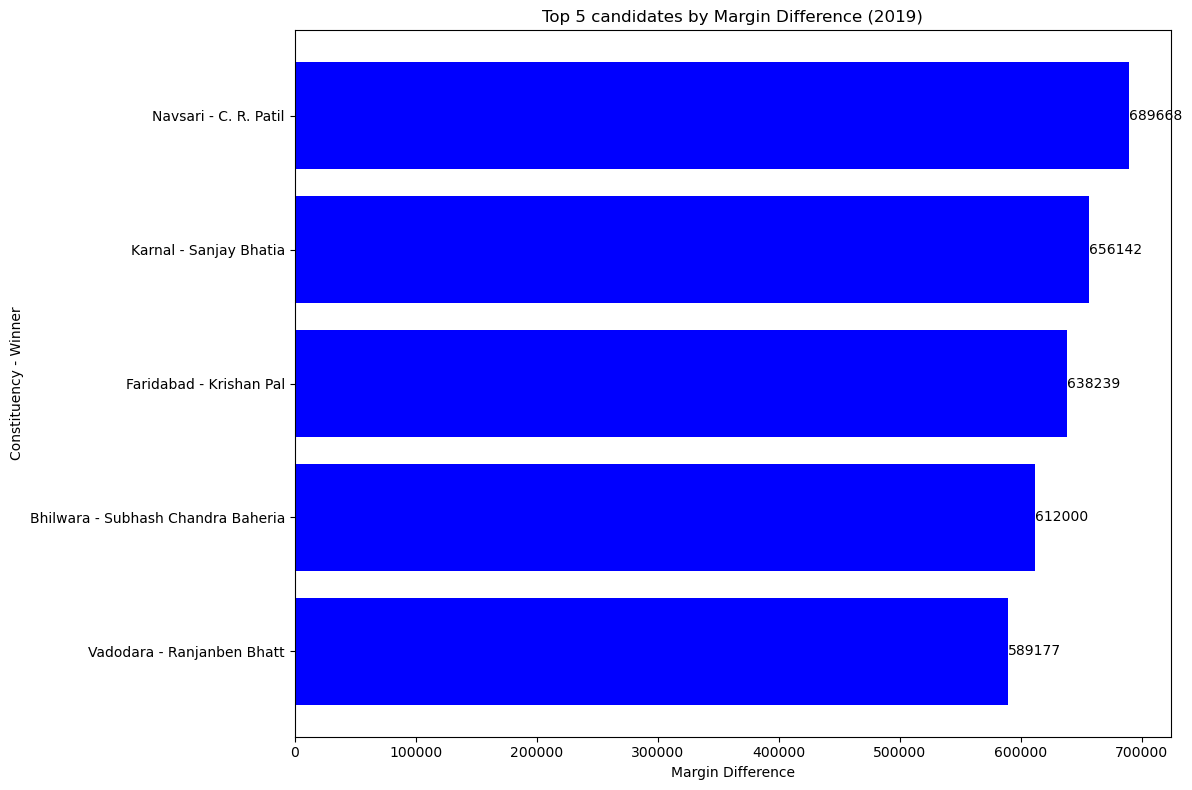

In [47]:
top_5_margins['label'] = top_5_margins['pc_name'] + ' - ' + top_5_margins['winner']

plt.figure(figsize=(12, 8))
plt.barh(top_5_margins['label'], top_5_margins['margin_difference'], color='b')

for index, value in enumerate(top_5_margins['margin_difference']):
    plt.text(value, index, f'{value}', va='center', ha='left')

plt.xlabel('Margin Difference')
plt.ylabel('Constituency - Winner')
plt.title('Top 5 candidates by Margin Difference (2019)')
plt.tight_layout()
plt.gca().invert_yaxis()  
plt.show()

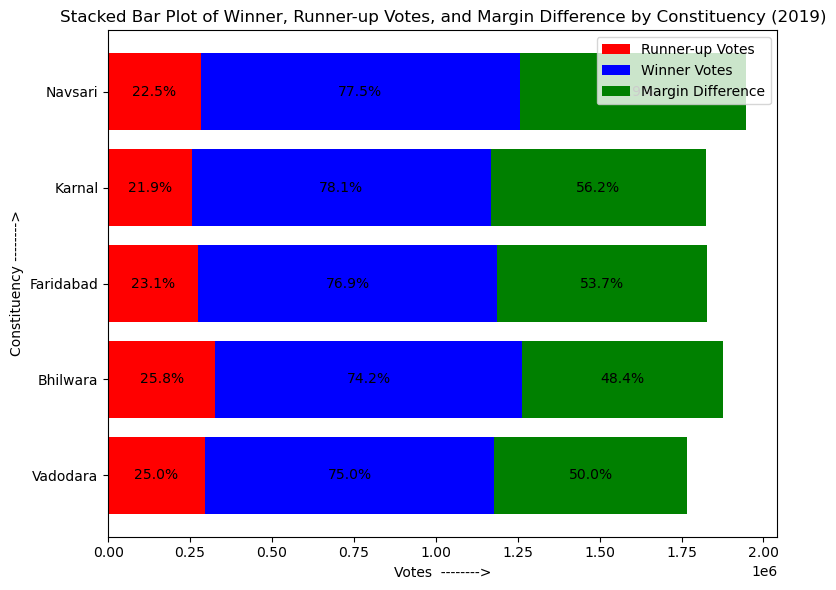

In [48]:
plt.figure(figsize=(8,6))
p1 = plt.barh(top_5_margins['pc_name'], top_5_margins['runner_up_votes'], color='r', label='Runner-up Votes')
p2 = plt.barh(top_5_margins['pc_name'], top_5_margins['winner_votes'], color='b', left=top_5_margins['runner_up_votes'], label='Winner Votes')
p3 = plt.barh(top_5_margins['pc_name'], top_5_margins['margin_difference'], color='g', left=top_5_margins['runner_up_votes'] + top_5_margins['winner_votes'], label='Margin Difference')

# Add labels and title
plt.ylabel('Constituency -------->')
plt.xlabel('Votes  -------->')
plt.title('Stacked Bar Plot of Winner, Runner-up Votes, and Margin Difference by Constituency (2019)')
plt.legend()

# Add percentage annotations on each bar
for _, row in top_5_margins.iterrows():
    runner_up_percentage = (row['runner_up_votes'] / (row['runner_up_votes'] + row['winner_votes'])) * 100
    winner_percentage = (row['winner_votes'] / (row['runner_up_votes'] + row['winner_votes'])) * 100
    margin_percentage = (row['margin_difference'] / (row['runner_up_votes'] + row['winner_votes'])) * 100
    plt.text(row['runner_up_votes'] / 2, row['pc_name'], f'{runner_up_percentage:.1f}%', ha='center', va='center')
    plt.text(row['runner_up_votes'] + row['winner_votes'] / 2, row['pc_name'], f'{winner_percentage:.1f}%', ha='center', va='center')
    plt.text(row['runner_up_votes'] + row['winner_votes'] + row['margin_difference'] / 2, row['pc_name'], f'{margin_percentage:.1f}%', ha='center', va='center')

# Show plot
plt.tight_layout()
plt.gca().invert_yaxis()  
plt.show()

# percent split of votes at State Level

In [49]:
votes_2014 = election_data.groupby(['state', 'party_2014'])['total_votes_2014'].sum().reset_index()
votes_2014 = votes_2014.rename(columns={'party_2014': 'party'})
votes_2019 =election_data.groupby(['state', 'party_2019'])['total_votes_2019'].sum().reset_index()
votes_2019 = votes_2019.rename(columns={'party_2019': 'party'})

merged_votes = pd.merge(votes_2014, votes_2019, on=['state', 'party'], how='outer').fillna(0)
total_votes_per_state_2014 = merged_votes.groupby('state')['total_votes_2014'].sum().reset_index().rename(columns={'total_votes_2014': 'total_votes_2014_state'})
total_votes_per_state_2019 = merged_votes.groupby('state')['total_votes_2019'].sum().reset_index().rename(columns={'total_votes_2019': 'total_votes_2019_state'})
merged_votes = pd.merge(merged_votes, total_votes_per_state_2014, on='state')
merged_votes = pd.merge(merged_votes, total_votes_per_state_2019, on='state')

merged_votes['percent_2014'] = (merged_votes['total_votes_2014'] / merged_votes['total_votes_2014_state']) * 100
merged_votes['percent_2019'] = (merged_votes['total_votes_2019'] / merged_votes['total_votes_2019_state']) * 100

sorted_data=merged_votes[['state', 'party', 'percent_2014', 'percent_2019']].sort_values(by=['percent_2019', 'percent_2014'],ascending=False)
print("percent split of votes at State Level")
sorted_data.head(36)


percent split of votes at State Level


state  party  percent_2014  percent_2019
498            Himachal Pradesh    Bjp     53.059798     69.449262
354                     Gujarat    Bjp     59.630297     62.332360
88            Arunachal Pradesh    Bjp     46.808538     60.176085
1781                Uttarakhand    Bjp     54.827746     59.362912
425                     Haryana    Bjp     34.487721     58.362564
1231                  Rajasthan    Bjp     55.476328     58.276487
771              Madhya Pradesh    Bjp     53.355295     58.127462
1132                 Puducherry    Inc     26.346962     56.272573
1051               Nct Of Delhi    Bjp     46.376121     56.045352
559                   Jharkhand    Bjp     40.892630     52.969856
634                   Karnataka    Bjp     44.201092     51.229046
1020                  Meghalaya    Inc     36.676105     51.079383
1886               Chhattisgarh    Bjp           NaN     50.699628
290                  Chandigarh    Bjp     42.200880     50.636050
1512              Uttar Pradesh    Bjp     42.591146     49.825357
338                         Goa    Bjp     53.449082     49.753931
1037                   Nagaland   Ndpp      0.000000     49.734836
1465                    Tripura    Bjp      5.622474     49.132583
323        Dadra & Nagar Haveli    Ind      1.685563     48.978053
752                 Lakshadweep    Ncp     50.105229     48.609841
52               Andhra Pradesh  Ysrcp     45.547801     48.528457
1032                   Nagaland    Inc     30.141879     48.110760
525             Jammu & Kashmir    Bjp     36.209892     47.643238
1294                     Sikkim    Skm     39.472177     47.455266
751                 Lakshadweep    Inc     46.555193     46.859112
1027                    Mizoram    Ind     47.167712     46.194215
7     Andaman & Nicobar Islands    Inc     43.691417     45.976768
3     Andaman & Nicobar Islands    Bjp     47.795910     45.298028
1030                    Mizoram    Mnf      0.000000     44.891228
343                         Goa    Inc     36.566707     43.996976
1293                     Sikkim    Sdf     52.982357     43.920613
1817                West Bengal   Aitc     38.460528     43.016855
331                 Daman & Diu    Bjp     53.832838     42.983228
1927                     Odisha    Bjd           NaN     42.758548
319        Dadra & Nagar Haveli    Bjp     48.878913     40.918068
1901               Chhattisgarh    Inc           NaN     40.906403

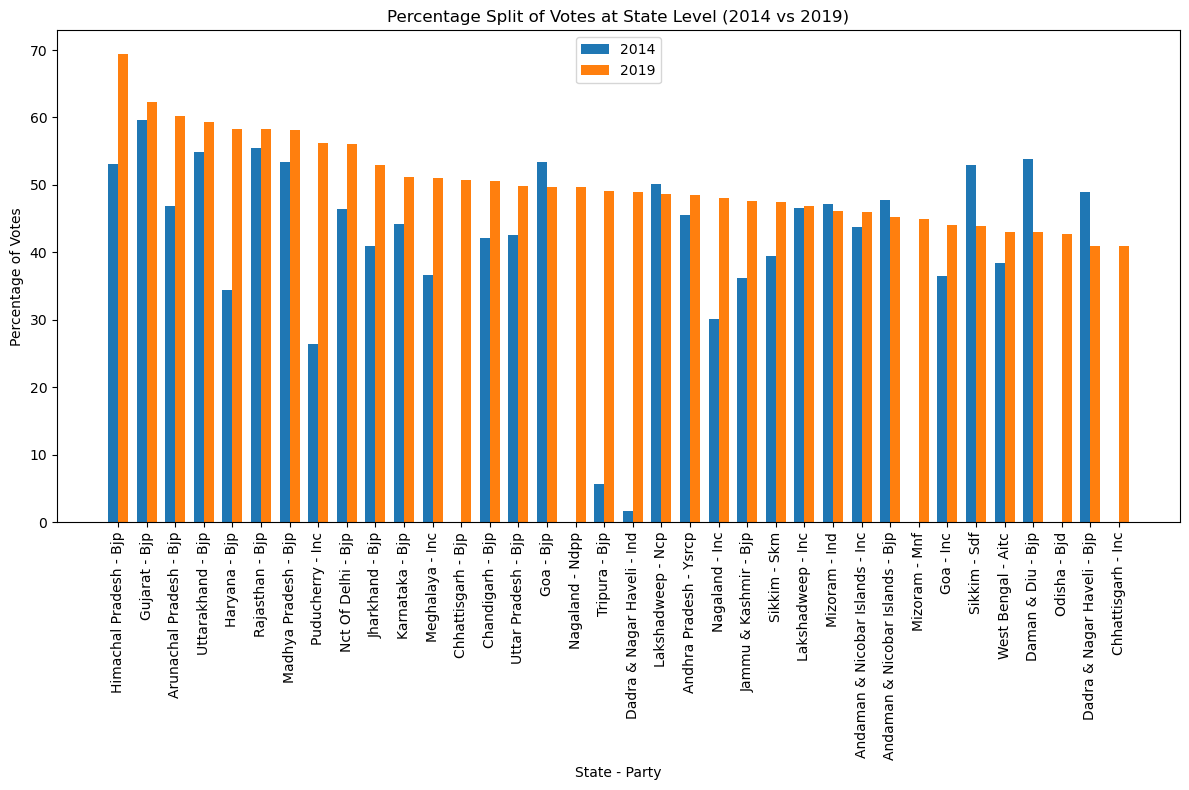

In [50]:
top_states_data = sorted_data.head(36)

plt.figure(figsize=(12, 8))

# Set the width of the bars
bar_width = 0.35

# Set the index for the x-axis
index = range(len(top_states_data))

# Plot the bars for percentage of votes in 2014
bars1 = plt.bar(index, top_states_data['percent_2014'], bar_width, label='2014')

# Plot the bars for percentage of votes in 2019
bars2 = plt.bar([i + bar_width for i in index], top_states_data['percent_2019'], bar_width, label='2019')

# Add labels and title
plt.xlabel('State - Party')
plt.ylabel('Percentage of Votes')
plt.title('Percentage Split of Votes at State Level (2014 vs 2019)')
plt.xticks([i + bar_width / 2 for i in index], top_states_data['state'] + ' - ' + top_states_data['party'], rotation=90)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

### percent split of votes at National Level

In [51]:
votes_2014 = election_data.groupby('party_2014')['total_votes_2014'].sum().reset_index()
votes_2019 = election_data.groupby('party_2019')['total_votes_2019'].sum().reset_index()
total_votes_2014 = votes_2014['total_votes_2014'].sum()
total_votes_2019 = votes_2019['total_votes_2019'].sum()
votes_2014['percent_2014'] = (votes_2014['total_votes_2014'] / total_votes_2014) * 100
votes_2019['percent_2019'] = (votes_2019['total_votes_2019'] / total_votes_2019) * 100
votes_2014 = votes_2014.rename(columns={'party_2014': 'party'})
votes_2019 = votes_2019.rename(columns={'party_2019': 'party'})
merged_votes = pd.merge(votes_2014, votes_2019, on='party', how='outer').fillna(0)
print("percent split of votes at National Level")
top_5_data=merged_votes[['party', 'percent_2014', 'percent_2019']].sort_values(by=['percent_2019', 'percent_2014'],ascending=False).head()
top_5_data

percent split of votes at National Level


party  percent_2014  percent_2019
91    Bjp     29.691215     36.042275
173   Inc     18.674642     19.382061
123   Bsp      3.822929      3.826432
143   Dmk      2.598065      3.330803
34   Aitc      2.964398      3.160815

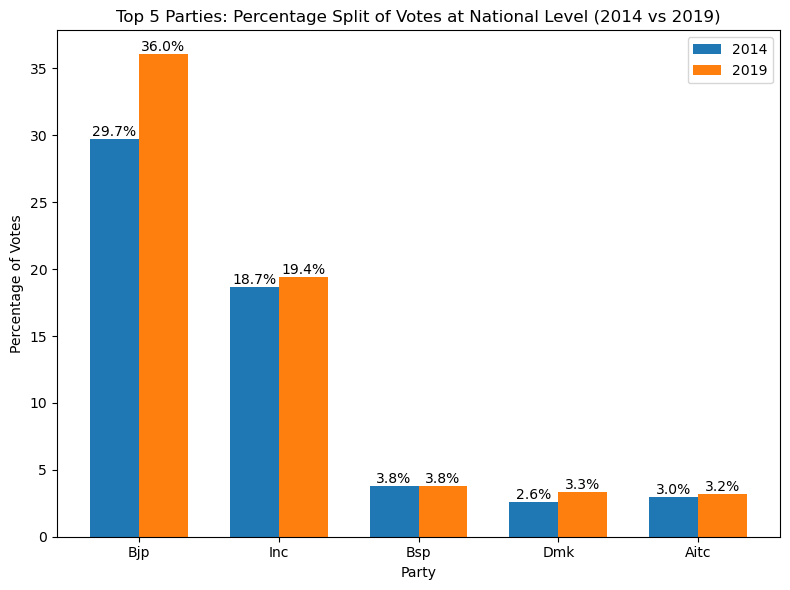

In [52]:
top_5_data = merged_votes[['party', 'percent_2014', 'percent_2019']].sort_values(by=['percent_2019', 'percent_2014'], ascending=False).head()

# Plotting
plt.figure(figsize=(8, 6))

bar_width = 0.35
index = range(len(top_5_data))

bars1 = plt.bar(index, top_5_data['percent_2014'], bar_width, label='2014')
bars2 = plt.bar([i + bar_width for i in index], top_5_data['percent_2019'], bar_width, label='2019')

plt.xlabel('Party')
plt.ylabel('Percentage of Votes')
plt.title('Top 5 Parties: Percentage Split of Votes at National Level (2014 vs 2019)')
plt.xticks([i + bar_width / 2 for i in index], top_5_data['party'])
plt.legend()

# Annotate the bars with the vote percentages
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}%', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Gained VOTE SHARE in 2019

In [53]:
election_data_2014['vote_share_2014'] = (election_data['total_votes_2014'] / election_data['total_electors_2014']) * 100
election_data_2019['vote_share_2019'] = (election_data['total_votes_2019'] / election_data['total_electors_2019']) * 100
merged_data = pd.merge(election_data_2014, election_data_2019, on=['pc_name', 'party'], how='inner')
merged_data['vote_share_diff'] = merged_data['vote_share_2019'] - merged_data['vote_share_2014']
major_parties = ['Bjp']
major_parties_data = merged_data[merged_data['party'].isin(major_parties)]
sorted_data = major_parties_data.sort_values(by='vote_share_diff', ascending=False)
top_5_gainers = sorted_data.head(5)
print("'Bjp' Gained VOTE SHARE in 2019")
top_5_gainers[['pc_name', 'party', 'vote_share_2014', 'vote_share_2019']]

'Bjp' Gained VOTE SHARE in 2019


pc_name party  vote_share_2014  vote_share_2019
28917   Barasat   Bjp         2.463823        50.184392
12037  Khargone   Bjp         0.393209        47.492240
27579     Unnao   Bjp         0.168551        46.253482
27543   Misrikh   Bjp         0.424602        46.253482
28405     Ghosi   Bjp         0.307612        45.622046

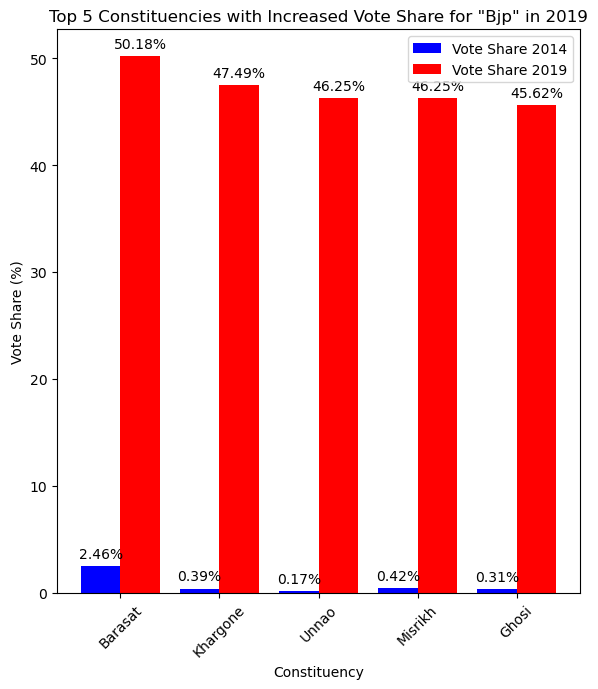

In [54]:
x = top_5_gainers['pc_name']
y1 = top_5_gainers['vote_share_2014']
y2 = top_5_gainers['vote_share_2019']

# Set the figure size
plt.figure(figsize=(6,7))

# Set the width of the bars
bar_width = 0.4

# Set the index for the x-axis
index = range(len(top_5_gainers))

# Plot the bars for vote share in 2014
plt.bar(index, y1, bar_width, color='blue', label='Vote Share 2014')

# Plot the bars for vote share in 2019
plt.bar([i + bar_width for i in index], y2, bar_width, color='red', label='Vote Share 2019')

# Add labels and title
plt.xlabel('Constituency')
plt.ylabel('Vote Share (%)')
plt.title('Top 5 Constituencies with Increased Vote Share for "Bjp" in 2019')
plt.xticks([i + bar_width / 2 for i in index], x, rotation=45)
plt.legend()

# Add percentage annotations on each bar
for i in index:
    plt.text(i, y1.iloc[i] + 0.5, f'{y1.iloc[i]:.2f}%', ha='center', va='bottom')
    plt.text(i + bar_width, y2.iloc[i] + 0.5, f'{y2.iloc[i]:.2f}%', ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

In [55]:
major_parties = ['Inc']
major_parties_data = merged_data[merged_data['party'].isin(major_parties)]
sorted_data = major_parties_data.sort_values(by='vote_share_diff', ascending=False)
top_5_gainers = sorted_data.head(5)
print("'INC' Gained VOTE SHARE in 2019")
top_5_gainers[['pc_name', 'party', 'vote_share_2014', 'vote_share_2019']]

'INC' Gained VOTE SHARE in 2019


pc_name party  vote_share_2014  vote_share_2019
25460  Virudhunagar   Inc         0.382862        47.907330
12036      Khargone   Inc         0.131682        47.492240
27587         Unnao   Inc         0.118350        46.253482
27545       Misrikh   Inc         0.124072        46.253482
28720   Robertsganj   Inc         0.412486        45.309515

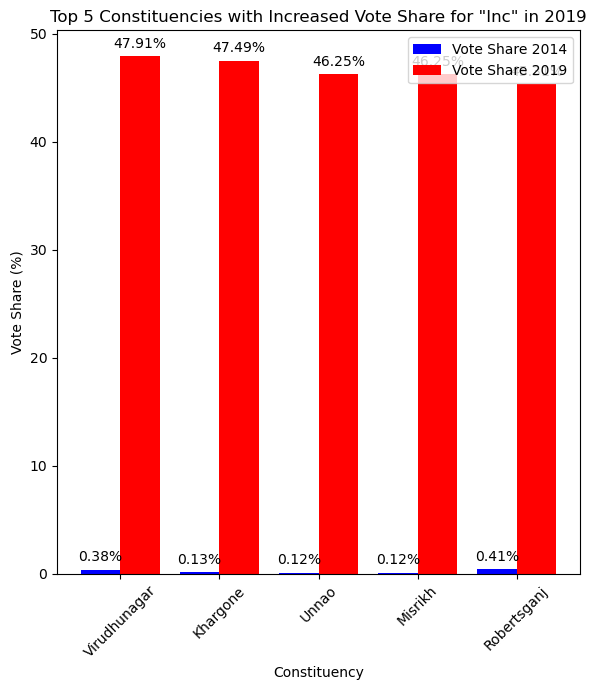

In [56]:
x = top_5_gainers['pc_name']
y1 = top_5_gainers['vote_share_2014']
y2 = top_5_gainers['vote_share_2019']

# Set the figure size
plt.figure(figsize=(6,7))

# Set the width of the bars
bar_width = 0.4

# Set the index for the x-axis
index = range(len(top_5_gainers))

# Plot the bars for vote share in 2014
plt.bar(index, y1, bar_width, color='blue', label='Vote Share 2014')

# Plot the bars for vote share in 2019
plt.bar([i + bar_width for i in index], y2, bar_width, color='red', label='Vote Share 2019')

# Add labels and title
plt.xlabel('Constituency')
plt.ylabel('Vote Share (%)')
plt.title('Top 5 Constituencies with Increased Vote Share for "Inc" in 2019')
plt.xticks([i + bar_width / 2 for i in index], x, rotation=45)
plt.legend()

# Add percentage annotations on each bar
for i in index:
    plt.text(i, y1.iloc[i] + 0.5, f'{y1.iloc[i]:.2f}%', ha='center', va='bottom')
    plt.text(i + bar_width, y2.iloc[i] + 0.5, f'{y2.iloc[i]:.2f}%', ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

### Lost VOTE SHARE in 2019

In [57]:
merged_data['vote_share_diff'] = merged_data['vote_share_2014'] - merged_data['vote_share_2019']
major_parties = ['Bjp']
major_parties_data = merged_data[merged_data['party'].isin(major_parties)]
sorted_data = major_parties_data.sort_values(by='vote_share_diff', ascending=False)
top_5_lost = sorted_data.head(5)
print("'Bjp' Lost VOTE SHARE in 2019")
top_5_lost[['pc_name', 'party', 'vote_share_2014', 'vote_share_2019']]

'Bjp' Lost VOTE SHARE in 2019


pc_name party  vote_share_2014  vote_share_2019
4013      Pataliputra   Bjp        43.785428         0.062663
27029          Nagina   Bjp        42.141468         0.236365
10732  Pathanamthitta   Bjp        41.750629         0.032999
15999           Latur   Bjp        41.776196         0.073310
2921        Dibrugarh   Bjp        40.561794         0.165528

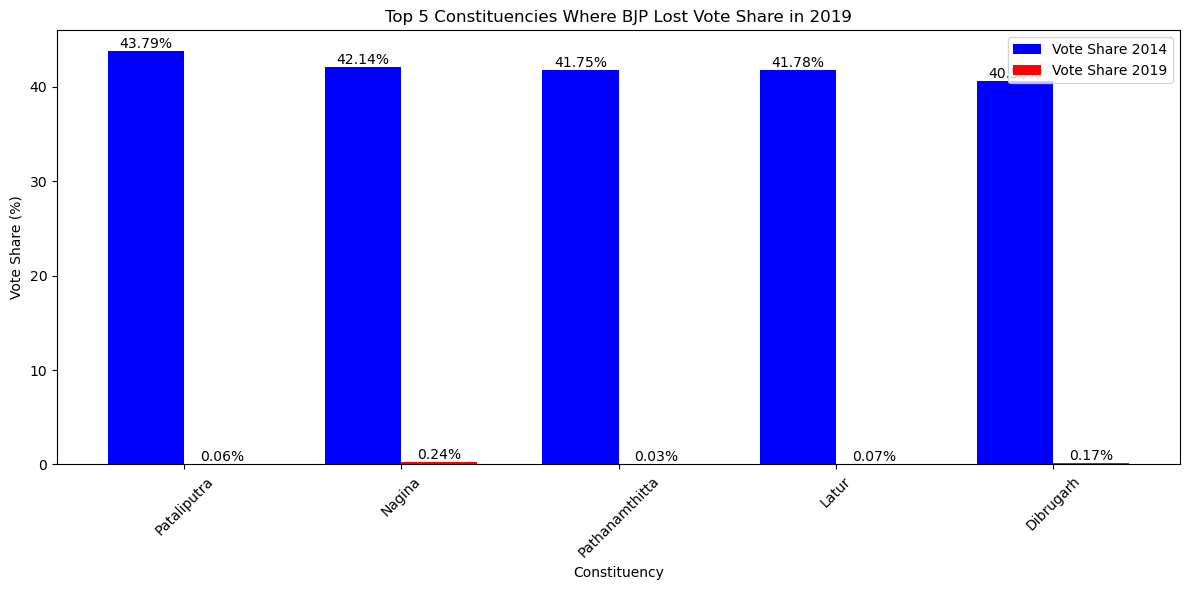

In [58]:
x = top_5_lost['pc_name']
y1 = top_5_lost['vote_share_2014']
y2 = top_5_lost['vote_share_2019']

# Set the figure size
plt.figure(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.35

# Set the index for the x-axis
index = range(len(top_5_lost))

# Plot the bars for vote share in 2014
bars1 = plt.bar(index, y1, bar_width, color='blue', label='Vote Share 2014')

# Plot the bars for vote share in 2019
bars2 = plt.bar([i + bar_width for i in index], y2, bar_width, color='red', label='Vote Share 2019')

# Add labels and title
plt.xlabel('Constituency')
plt.ylabel('Vote Share (%)')
plt.title('Top 5 Constituencies Where BJP Lost Vote Share in 2019')
plt.xticks([i + bar_width / 2 for i in index], x, rotation=45)
plt.legend()

# Add percentage annotations on each bar
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

In [59]:
merged_data['vote_share_diff'] = merged_data['vote_share_2014'] - merged_data['vote_share_2019']
major_parties = ['Inc']
major_parties_data = merged_data[merged_data['party'].isin(major_parties)]
sorted_data = major_parties_data.sort_values(by='vote_share_diff', ascending=False)
top_5_lost = sorted_data.head(5)
print("'INC' Lost VOTE SHARE in 2019")
top_5_lost [['pc_name', 'party', 'vote_share_2014', 'vote_share_2019', 'vote_share_diff']]

'INC' Lost VOTE SHARE in 2019


pc_name party  vote_share_2014  vote_share_2019  vote_share_diff
28454    Jaunpur   Inc        43.970631         0.392094        43.578536
6504       Hisar   Inc        43.667651         0.241093        43.426558
16768   Amritsar   Inc        43.341439         0.028402        43.313037
4518   North Goa   Inc        44.366682         1.096788        43.269894
7324     Gurgaon   Inc        42.888723         0.841083        42.047640

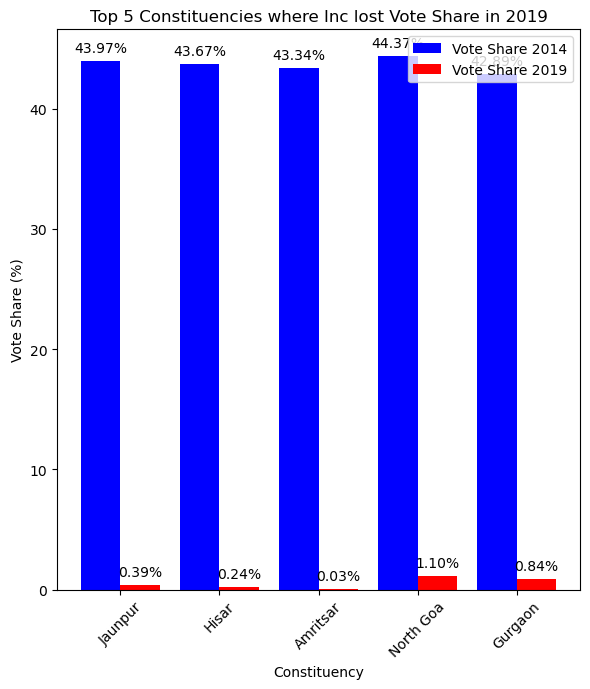

In [60]:
x = top_5_lost['pc_name']
y1 =top_5_lost['vote_share_2014']
y2 = top_5_lost['vote_share_2019']

# Set the figure size
plt.figure(figsize=(6,7))

# Set the width of the bars
bar_width = 0.4

# Set the index for the x-axis
index = range(len(top_5_lost))

# Plot the bars for vote share in 2014
plt.bar(index, y1, bar_width, color='blue', label='Vote Share 2014')

# Plot the bars for vote share in 2019
plt.bar([i + bar_width for i in index], y2, bar_width, color='red', label='Vote Share 2019')

# Add labels and title
plt.xlabel('Constituency')
plt.ylabel('Vote Share (%)')
plt.title('Top 5 Constituencies where Inc lost Vote Share in 2019')
plt.xticks([i + bar_width / 2 for i in index], x, rotation=45)
plt.legend()

# Add percentage annotations on each bar
for i in index:
    plt.text(i, y1.iloc[i] + 0.5, f'{y1.iloc[i]:.2f}%', ha='center', va='bottom')
    plt.text(i + bar_width, y2.iloc[i] + 0.5, f'{y2.iloc[i]:.2f}%', ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

### constituencies that voted most for NOTA in 2014

In [61]:
election_data['vote_percentage_2014'] = (election_data['total_votes_2014'] / election_data['total_electors_2014']) * 100
NOTA_data_14 = election_data[election_data['party_2014'] == 'Nota']
NOTA_data_14_sorted = NOTA_data_14.sort_values(by='vote_percentage_2014', ascending=False)
print("Constituencies that voted most for NOTA in 2014:")
unique_constituencies_info = NOTA_data_14_sorted.drop_duplicates(subset=['state', 'pc_name'], keep='first')
unique_constituencies_info[['state', 'pc_name', 'party_2014', 'total_votes_2014', 'total_electors_2014', 'vote_percentage_2014']]

Constituencies that voted most for NOTA in 2014:


state                    pc_name party_2014  \
91754                  Tamil Nadu                   Nilgiris       Nota   
71271                   Meghalaya                       Tura       Nota   
147462                 Puducherry                 Puducherry       Nota   
132361                  Jharkhand                  Singhbhum       Nota   
23250                     Gujarat                      Dahod       Nota   
132389                  Jharkhand                     Khunti       Nota   
80879                   Rajasthan                   Banswara       Nota   
13462                       Bihar            Samastipur (Sc)       Nota   
23432                     Gujarat             Chhota Udaipur       Nota   
41908                      Kerala                 Malappuram       Nota   
48994              Madhya Pradesh                 Chhindwara       Nota   
50760              Madhya Pradesh                     Ratlam       Nota   
42353                      Kerala                    Alathur       Nota   
24535                     Gujarat                     Valsad       Nota   
5649                        Assam        Autonomous District       Nota   
56118                 Maharashtra          Gadchiroli-Chimur       Nota   
23447                     Gujarat                    Bharuch       Nota   
51623              Madhya Pradesh                      Betul       Nota   
84783                  Tamil Nadu            Chennai Central       Nota   
23173                     Gujarat                 Panchmahal       Nota   
94516                  Tamil Nadu            Tiruchirappalli       Nota   
13685                       Bihar                   Khagaria       Nota   
127877                West Bengal                    Bankura       Nota   
127298                West Bengal                   Jhargram       Nota   
48335              Madhya Pradesh                     Mandla       Nota   
143280       Dadra & Nagar Haveli       Dadra & Nagar Haveli       Nota   
132654                  Jharkhand                  Lohardaga       Nota   
13618                       Bihar                  Begusarai       Nota   
7099                        Assam                  Dibrugarh       Nota   
128907                  Jharkhand                   Rajmahal       Nota   
80786                   Rajasthan                    Udaipur       Nota   
9512                        Bihar                     Supaul       Nota   
5139            Arunachal Pradesh             Arunachal East       Nota   
129111                  Jharkhand                      Dumka       Nota   
127992                West Bengal                  Bishnupur       Nota   
12597                       Bihar                Maharajganj       Nota   
85636                  Tamil Nadu              Sriperumbudur       Nota   
10693                       Bihar                  Darbhanga       Nota   
81691                  Tamil Nadu                Thiruvallur       Nota   
19489                     Gujarat                Sabarkantha       Nota   
60053                 Maharashtra                    Palghar       Nota   
90012                  Tamil Nadu                      Salem       Nota   
97687                  Tamil Nadu                    Madurai       Nota   
47781              Madhya Pradesh                    Shahdol       Nota   
12386                       Bihar                      Siwan       Nota   
122288                West Bengal                Alipurduars       Nota   
7597                        Bihar          Paschim Champaran       Nota   
64156                 Maharashtra                     Raigad       Nota   
6725                        Assam                     Tezpur       Nota   
51389              Madhya Pradesh                   Khargone       Nota   
23                 Andhra Pradesh                      Aruku       Nota   
96386                  Tamil Nadu               Nagapattinam       Nota   
22426                     Gujarat                    

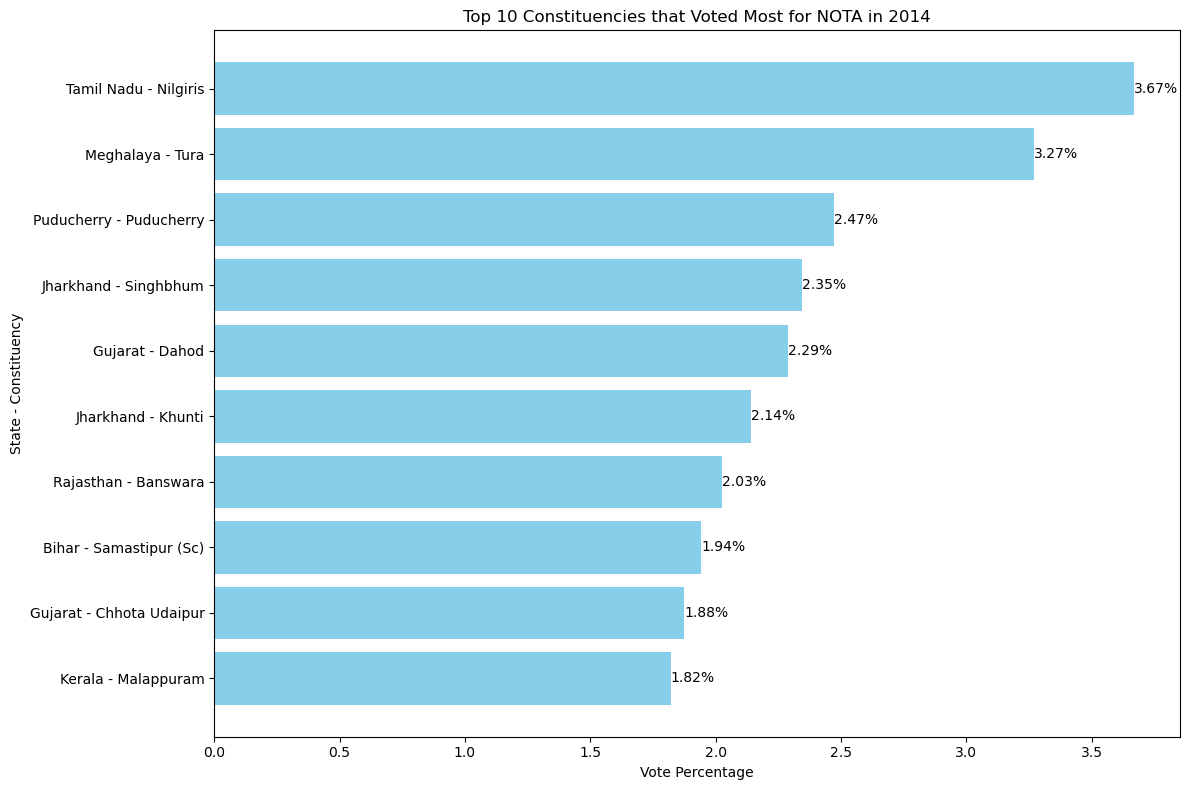

Constituencies that voted most for NOTA in 2014:


state          pc_name party_2014  total_votes_2014  \
91754   Tamil Nadu         Nilgiris       Nota           46559.0   
71271    Meghalaya             Tura       Nota           19185.0   
147462  Puducherry       Puducherry       Nota           22268.0   
132361   Jharkhand        Singhbhum       Nota           27037.0   
23250      Gujarat            Dahod       Nota           32305.0   
132389   Jharkhand           Khunti       Nota           23816.0   
80879    Rajasthan         Banswara       Nota           34404.0   
13462        Bihar  Samastipur (Sc)       Nota           29211.0   
23432      Gujarat   Chhota Udaipur       Nota           28815.0   
41908       Kerala       Malappuram       Nota           21829.0   

        total_electors_2014  vote_percentage_2014  
91754             1269173.0              3.668452  
71271              586501.0              3.271094  
147462             901357.0              2.470497  
132361            1152632.0              2.345675  
23250             1411765.0              2.288270  
132389            1111856.0              2.142004  
80879             1698244.0              2.025857  
13462             1504451.0              1.941639  
23432             1536305.0              1.875604  
41908             1198444.0              1.821445

In [62]:
NOTA_data_14 = election_data[election_data['party_2014'] == 'Nota']

# Sort and drop duplicates to get the top constituencies
NOTA_data_14_sorted = NOTA_data_14.sort_values(by='vote_percentage_2014', ascending=False)
unique_constituencies_info = NOTA_data_14_sorted.drop_duplicates(subset=['state', 'pc_name'], keep='first')

# Select relevant columns
NOTA_top_10 = unique_constituencies_info[['state', 'pc_name', 'party_2014', 'total_votes_2014', 'total_electors_2014', 'vote_percentage_2014']].head(10)

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(NOTA_top_10['state'] + ' - ' + NOTA_top_10['pc_name'], NOTA_top_10['vote_percentage_2014'], color='skyblue')
plt.xlabel('Vote Percentage')
plt.ylabel('State - Constituency')
plt.title('Top 10 Constituencies that Voted Most for NOTA in 2014')

# Add data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  # Invert y-axis to display the constituency with the highest vote percentage on top
plt.tight_layout()
plt.show()

print("Constituencies that voted most for NOTA in 2014:")
NOTA_top_10

In [63]:
election_data['vote_percentage_2019'] = (election_data['total_votes_2019'] / election_data['total_electors_2019']) * 100
NOTA_data_19 = election_data[election_data['party_2019'] == 'Nota']
NOTA_data_19_sorted = NOTA_data_19.sort_values(by='vote_percentage_2019', ascending=False)
print("Constituencies that voted most for NOTA in 2019:")
unique_constituencies_info = NOTA_data_19_sorted.drop_duplicates(subset=['state', 'pc_name'], keep='first')
unique_constituencies_info[['state', 'pc_name', 'party_2019', 'total_votes_2019', 'total_electors_2019', 'vote_percentage_2019']]

Constituencies that voted most for NOTA in 2019:


state                    pc_name party_2019  \
120                Andhra Pradesh                      Aruku       Nota   
71428                      Odisha                Nabarangpur       Nota   
128741               Chhattisgarh                     Bastar       Nota   
12218                       Bihar             Gopalganj (Sc)       Nota   
7642                        Bihar          Paschim Champaran       Nota   
71514                      Odisha                    Koraput       Nota   
18518                       Bihar                 Jamui (Sc)       Nota   
830                Andhra Pradesh                 Anakapalli       Nota   
13502                       Bihar            Samastipur (Sc)       Nota   
7506                        Bihar              Valmiki Nagar       Nota   
10638                       Bihar                  Madhepura       Nota   
23256                     Gujarat                      Dahod       Nota   
23428                     Gujarat             Chhota Udaipur       Nota   
382                Andhra Pradesh               Vizianagaram       Nota   
50815              Madhya Pradesh                     Ratlam       Nota   
132364                  Jharkhand                  Singhbhum       Nota   
18409                       Bihar                     Nawada       Nota   
128585               Chhattisgarh                    Sarguja       Nota   
132548                  Jharkhand                     Khunti       Nota   
18155                       Bihar                  Gaya (Sc)       Nota   
17821                       Bihar                  Jahanabad       Nota   
14141                       Bihar                  Bhagalpur       Nota   
130285                  Jharkhand                    Kodarma       Nota   
128751               Chhattisgarh                     Kanker       Nota   
12786                       Bihar                      Saran       Nota   
48383              Madhya Pradesh                     Mandla       Nota   
232                Andhra Pradesh                 Srikakulam       Nota   
5136            Arunachal Pradesh             Arunachal East       Nota   
7140                        Assam                  Dibrugarh       Nota   
60150                 Maharashtra                    Palghar       Nota   
4861               Andhra Pradesh                   Tirupati       Nota   
56123                 Maharashtra          Gadchiroli-Chimur       Nota   
80900                   Rajasthan                   Banswara       Nota   
1950               Andhra Pradesh                      Eluru       Nota   
71365                      Odisha                 Mayurbhanj       Nota   
91620                  Tamil Nadu                   Tiruppur       Nota   
12969                       Bihar               Hajipur (Sc)       Nota   
4966               Andhra Pradesh                   Rajampet       Nota   
8004                        Bihar            Purvi Champaran       Nota   
80855                   Rajasthan                    Udaipur       Nota   
49004              Madhya Pradesh                 Chhindwara       Nota   
3345               Andhra Pradesh                     Ongole       Nota   
91755                  Tamil Nadu                   Nilgiris       Nota   
85934                  Tamil Nadu               Kancheepuram       Nota   
71423                      Odisha                  Kalahandi       Nota   
5043               Andhra Pradesh                   Chittoor       Nota   
51696              Madhya Pradesh                      Betul       Nota   
128733               Chhattisgarh                 Mahasamund       Nota   
87466                  Tamil Nadu                Krishnagiri       Nota   
17960                       Bihar                 Aurangabad       Nota   
122359                West Bengal                Alipurduars       Nota   
128630               Chhattisgarh                      Korba       Nota   
18578                         Goa                  No

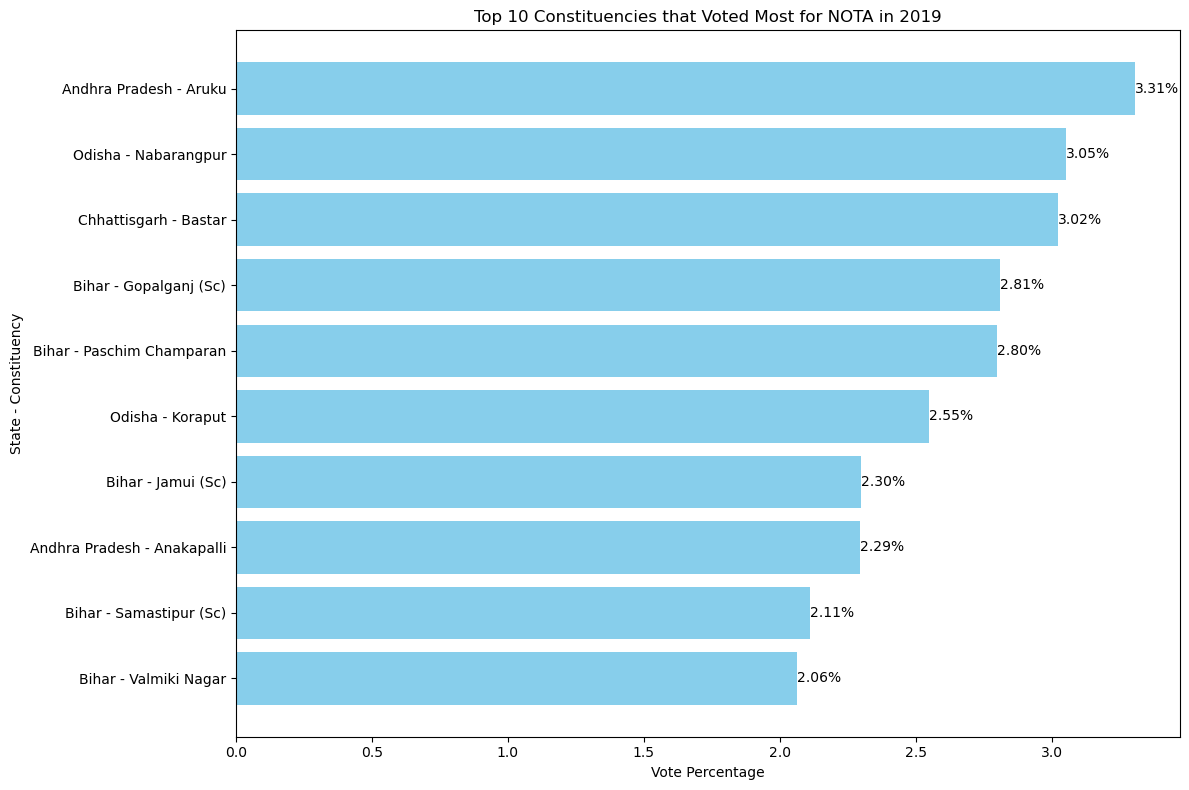

Constituencies that voted most for NOTA in 2019:


state            pc_name party_2019  total_votes_2019  \
120     Andhra Pradesh              Aruku       Nota             47977   
71428           Odisha        Nabarangpur       Nota             44582   
128741    Chhattisgarh             Bastar       Nota             41667   
12218            Bihar     Gopalganj (Sc)       Nota             51660   
7642             Bihar  Paschim Champaran       Nota             45699   
71514           Odisha            Koraput       Nota             36561   
18518            Bihar         Jamui (Sc)       Nota             39496   
830     Andhra Pradesh         Anakapalli       Nota             34897   
13502            Bihar    Samastipur (Sc)       Nota             35417   
7506             Bihar      Valmiki Nagar       Nota             34338   

        total_electors_2019  vote_percentage_2019  
120                 1451418              3.305526  
71428               1461004              3.051463  
128741              1379122              3.021270  
12218               1839514              2.808350  
7642                1633824              2.797058  
71514               1434384              2.548899  
18518               1718814              2.297864  
830                 1521363              2.293798  
13502               1679030              2.109373  
7506                1665502              2.061721

In [64]:
NOTA_data_19 = election_data[election_data['party_2019'] == 'Nota']

# Sort and drop duplicates to get the top constituencies
NOTA_data_19_sorted = NOTA_data_19.sort_values(by='vote_percentage_2019', ascending=False)
unique_constituencies_info = NOTA_data_19_sorted.drop_duplicates(subset=['state', 'pc_name'], keep='first')

# Select relevant columns
NOTA_top_10 = unique_constituencies_info[['state', 'pc_name', 'party_2019', 'total_votes_2019', 'total_electors_2019', 'vote_percentage_2019']].head(10)

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(NOTA_top_10['state'] + ' - ' + NOTA_top_10['pc_name'], NOTA_top_10['vote_percentage_2019'], color='skyblue')
plt.xlabel('Vote Percentage')
plt.ylabel('State - Constituency')
plt.title('Top 10 Constituencies that Voted Most for NOTA in 2019')

# Add data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  # Invert y-axis to display the constituency with the highest vote percentage on top
plt.tight_layout()
plt.show()

print("Constituencies that voted most for NOTA in 2019:")
NOTA_top_10

### constituency that have elected candidate whose party has less than 10percent vote share at state level

In [65]:
state_vote_share = election_data.groupby(['state', 'party_2019'])['total_votes_2019'].sum() / election_data.groupby('state')['total_votes_2019'].sum()

parties_below_10_percent = state_vote_share[state_vote_share < 0.10].reset_index()['party_2019']
candidates_below_10_percent = election_data[election_data['party_2019'].isin(parties_below_10_percent)]
constituencies_below_10_percent = candidates_below_10_percent['pc_name'].unique()

print("Constituencies that have elected candidates whose party has less than 10% vote share at the state level in 2019 :")
pd.Series(constituencies_below_10_percent)

Constituencies that have elected candidates whose party has less than 10% vote share at the state level in 2019 :


0                          Aruku
1                     Srikakulam
2                   Vizianagaram
3                  Visakhapatnam
4                     Anakapalli
5                       Kakinada
6                     Amalapuram
7                    Rajahmundry
8                     Narsapuram
9                          Eluru
10                 Machilipatnam
11                    Vijayawada
12                        Guntur
13                  Narasaraopet
14                       Bapatla
15                        Ongole
16                       Nandyal
17                       Kurnool
18                     Anantapur
19                      Hindupur
20                        Kadapa
21                       Nellore
22                      Tirupati
23                      Rajampet
24                      Chittoor
25                Arunachal West
26                Arunachal East
27                     Karimganj
28                       Silchar
29           Autonomous District
30        

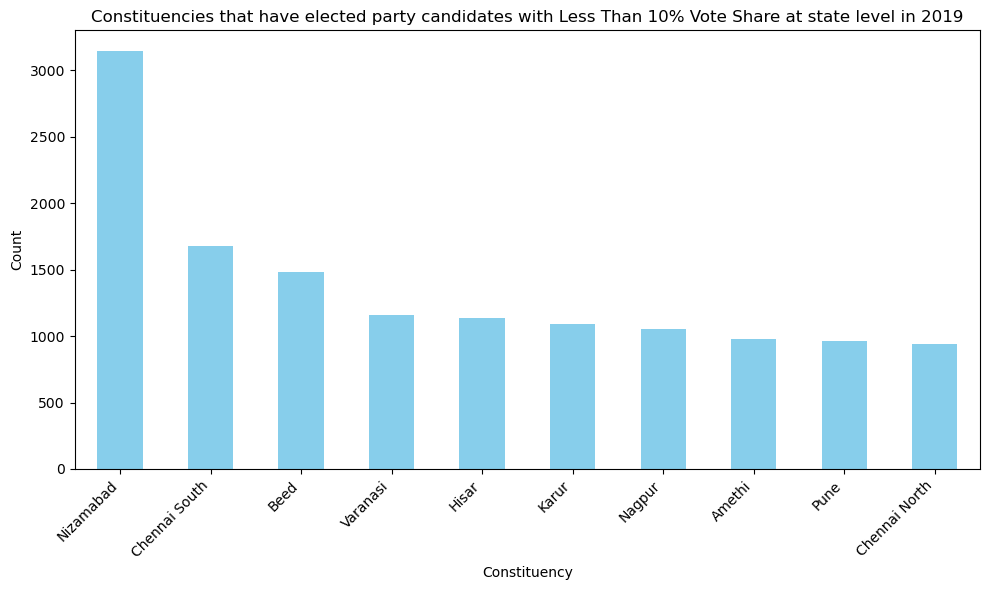

Constituencies that have elected party candidates with Less Than 10% Vote Share at state level in 2019


pc_name
Nizamabad        3145
Chennai South    1677
Beed             1480
Varanasi         1161
Hisar            1134
Karur            1092
Nagpur           1054
Amethi            980
Pune              960
Chennai North     943
Name: count, dtype: int64

In [66]:
state_vote_share = election_data.groupby(['state', 'party_2019'])['total_votes_2019'].sum() / election_data.groupby('state')['total_votes_2019'].sum()
parties_below_10_percent = state_vote_share[state_vote_share < 0.10].reset_index()['party_2019']
candidates_below_10_percent = election_data[election_data['party_2019'].isin(parties_below_10_percent)]
constituencies_below_10_percent = candidates_below_10_percent['pc_name'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))

constituencies_below_10_percent.plot(kind='bar', color='skyblue')
plt.title('Constituencies that have elected party candidates with Less Than 10% Vote Share at state level in 2019')
plt.xlabel('Constituency')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Constituencies that have elected party candidates with Less Than 10% Vote Share at state level in 2019")
constituencies_below_10_percent.head(10)


top_10


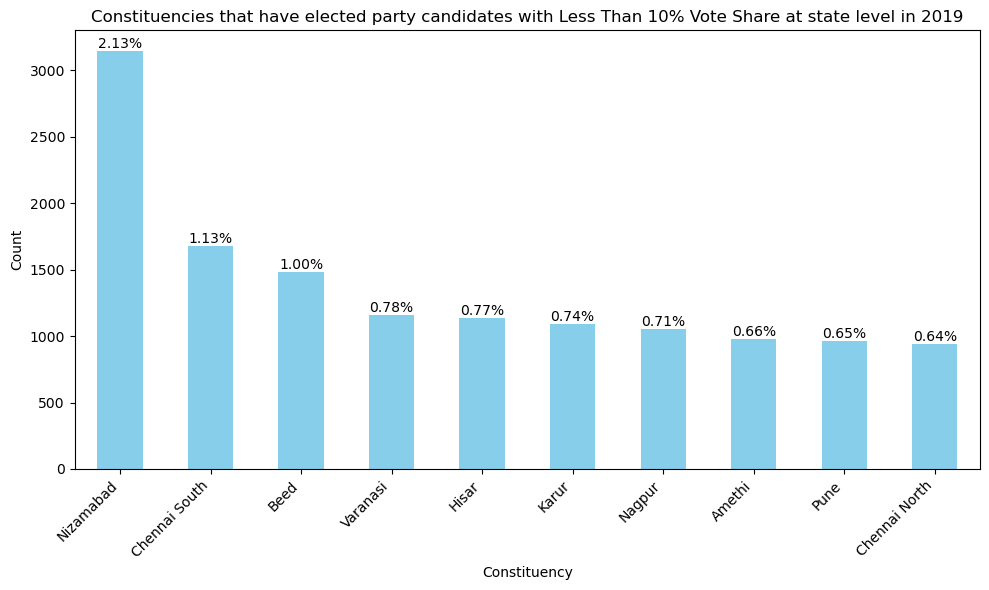

In [67]:
plt.figure(figsize=(10, 6))

constituencies_below_10_percent.plot(kind='bar', color='skyblue')
print("top_10")
plt.title("Constituencies that have elected party candidates with Less Than 10% Vote Share at state level in 2019")
plt.xlabel('Constituency')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Adding vote percentage on top of each bar
for i, v in enumerate(constituencies_below_10_percent):
    plt.text(i, v + 0.5, f'{v / len(election_data) * 100:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [69]:
constituency_data_19.to_xlsx("merged_file", index=False)

AttributeError: 'DataFrame' object has no attribute 'to_xlsx'

In [ ]:
dipd)